# Introduction

 

Welcome to our comprehensive analysis and visualization of the extensive dataset from Citi Bike, a bike-sharing service in New York. In this Business Analytics project, we embarked on a journey of data exploration, parameterization, data cleansing, and visualization. Our initial step involved importing the full Citi Bike dataset, where we conducted a thorough examination of the data's richness and quality characteristics. To enhance the dataset's integrity, we performed parameterization, identifying and mitigating outliers and potentially erroneous entries.

 

During this data preprocessing phase, we excluded entries involving start and end stations situated outside the bounds of our analysis scope. Furthermore, we filtered out records of senior riders and users over 80 years of age to focus our analysis on a specific demographic. 
 

A key focus of our project is to conduct an in-depth analysis of the middle-aged user demographic. We aim to draw meaningful insights regarding the advantages of bicycle usage for individuals aged over 60. This specific age group holds our attention, as we explore the potential health benefits and other implications of bicycle riding for this segment of the population.

 

In our analysis, we are also intrigued by the concept of social equity and how it relates to the use of bicycles. We intend to investigate and visually present the bustling neighborhoods of New York. An essential aspect of our study involves examining the relevance and adoption of bicycle usage within neighborhoods with varying socio-economic statuses, particularly those with a lower standard of living.

 

Through our careful data analysis and visualization, we aspire to gain deeper insights into the impact of bike-sharing services on the well-being of individuals and the broader community. Our project seeks to contribute to the understanding of the potential benefits that these services offer and to support data-driven decision-making in the realm of mobility and urban planning.


---

 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from tabulate import tabulate

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from tabulate import tabulate

---
Load csv file as a dataframe.

In [ ]:
trips_df = pd.read_csv("Trips_2018.csv")

In [ ]:
#We print the first 10 rows of our dataset, to have a look how our dataset looks like!
trips_df.head(10)

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1
5,5,1602,2018-01-01 21:31:54.1920,2018-01-01 21:58:36.3530,72.0,40.767272,-73.993929,482.0,40.739355,-73.999318,30106,Subscriber,1968,1
6,6,722,2018-01-02 07:54:53.6460,2018-01-02 08:06:55.8720,72.0,40.767272,-73.993929,228.0,40.754601,-73.971879,32059,Subscriber,1978,1
7,7,434,2018-01-02 08:06:14.3310,2018-01-02 08:13:28.7670,72.0,40.767272,-73.993929,173.0,40.760683,-73.984527,30525,Subscriber,1983,1
8,8,366,2018-01-02 08:10:15.2550,2018-01-02 08:16:21.8960,72.0,40.767272,-73.993929,479.0,40.760193,-73.991255,27439,Subscriber,1974,1
9,9,324,2018-01-02 08:13:30.8960,2018-01-02 08:18:55.1200,72.0,40.767272,-73.993929,450.0,40.762272,-73.987882,30892,Subscriber,1947,1


In [ ]:
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17548339 entries, 0 to 17548338
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   tripduration             int64  
 2   starttime                object 
 3   stoptime                 object 
 4   start_station_id         float64
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_latitude     float64
 9   end_station_longitude    float64
 10  bikeid                   int64  
 11  usertype                 object 
 12  birth_year               int64  
 13  gender                   int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 1.8+ GB


---
Transform starttime and enddtime to pd.timestamp and set starttime as index.
Also, drop Unnamed: 0 column.

In [ ]:
trips_df_datetimes = trips_df.copy()

trips_df_datetimes["starttime"] = pd.to_datetime(trips_df_datetimes["starttime"])
trips_df_datetimes["stoptime"] = pd.to_datetime(trips_df_datetimes["stoptime"])

trips_df_datetimes = trips_df_datetimes.set_index("starttime")
trips_df_datetimes = trips_df_datetimes.drop(columns="Unnamed: 0")

---
Find the missing values in the dataset.

In [ ]:
missing_values = trips_df_datetimes.isnull().sum()
print(missing_values)

tripduration               0
stoptime                   0
start_station_id           0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_latitude       0
end_station_longitude      0
bikeid                     0
usertype                   0
birth_year                 0
gender                     0
dtype: int64


The presence of 2497 missing values (NaN) in the 'start_station_id' and 'end_station_id' columns is a significant number, and excluding these stations entirely from our analysis may not be the best approach, as it could result in a loss of valuable information and potentially affect the spatial clustering of stations. This is why, we are going to fill them with 0.

---
Transform the station ids and tripduration to ints.


In [ ]:
trips_df_datetimes.dropna(subset=['end_station_id'], inplace=True)
trips_df_datetimes.dropna(subset=['start_station_id'], inplace=True)

In [ ]:
trips_df_datetimes["end_station_id"] = trips_df_datetimes["end_station_id"].astype(int)
trips_df_datetimes["start_station_id"] = trips_df_datetimes["start_station_id"].astype(int)
trips_df_datetimes["tripduration"] = trips_df_datetimes["tripduration"].astype(int)

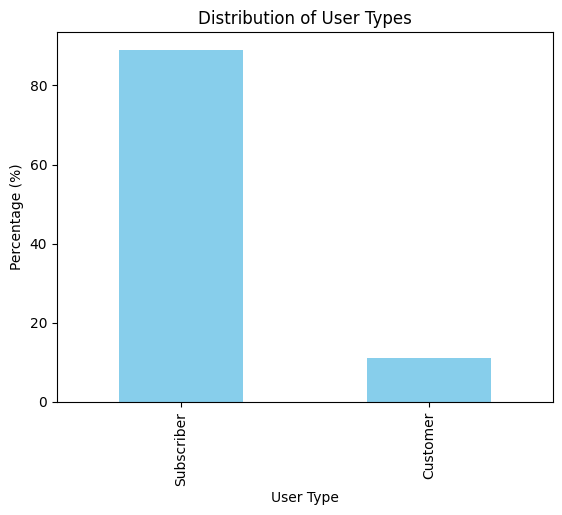

In [ ]:
# We will calculate the percentages of each user type
user_type_percentages = trips_df_datetimes['usertype'].value_counts(normalize=True) * 100

user_type_percentages.plot(kind='bar', color='skyblue')
plt.xlabel('User Type')
plt.ylabel('Percentage (%)')
plt.title('Distribution of User Types')

plt.show()

As we can see more than 80 percent of the users are subscribers.

---

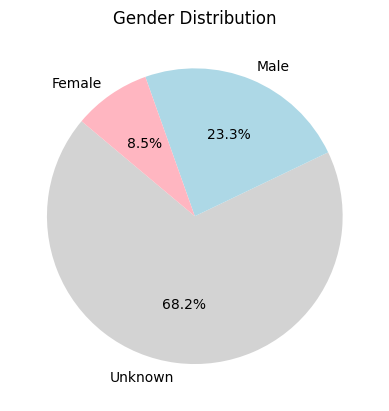

In [ ]:
# We will calculate the count of each gender
gender_counts = trips_df_datetimes['gender'].value_counts()

labels = ['Unknown', 'Male', 'Female']
colors = ['lightgray', 'lightblue', 'lightpink']
plt.pie(gender_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')

plt.show()

68.2% of the users have not registered their gender as Male / Female.

---

In [ ]:
max_datetime = trips_df_datetimes.index.max()
min_datetime = trips_df_datetimes.index.min()

print("Maximum Datetime Index Value:", max_datetime)
print("Minimum Datetime Index Value:", min_datetime)

Maximum Datetime Index Value: 2018-12-31 23:59:51.085000
Minimum Datetime Index Value: 2018-01-01 00:01:50.650000


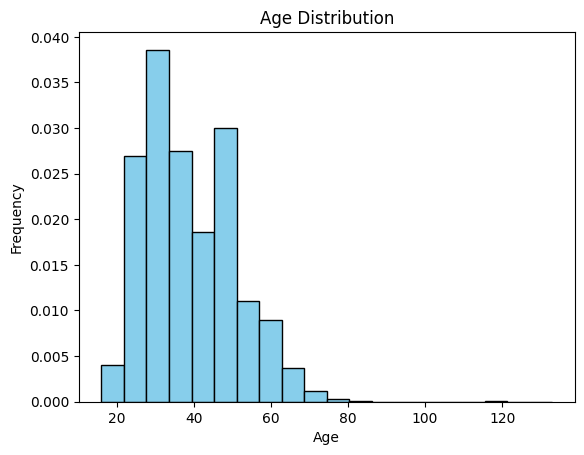

In [ ]:
# In order to calculate the age distribution we set as a final date the date that the dataset was published !
year_2018 = datetime.datetime(2018, 12, 31).year

# We calculated user ages based on year of birth and our date!
trips_df_datetimes['age'] = year_2018 - trips_df_datetimes['birth_year']

# We filtered out invalid ages (age < 0)
valid_ages = trips_df_datetimes[(trips_df_datetimes['age'] >= 0)]

plt.hist(valid_ages['age'], bins=20,color='skyblue', edgecolor='black', density=True)  # You can adjust the number of bins as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

plt.show()

As we can see that there are registered users older than 85 years old, or even 100+. We could exclude these rows from the dataframe.

---

In [ ]:
trips_df_datetimes = trips_df_datetimes[trips_df_datetimes['age'] <= 80]

In [ ]:
trips_df_datetimes['age'].unique()

array([26, 49, 62, 44, 50, 40, 35, 71, 36, 27, 55, 51, 54, 53, 45, 41, 22,
       33, 58, 56, 59, 52, 61, 39, 29, 31, 30, 34, 38, 23, 60, 48, 24, 46,
       47, 63, 25, 28, 66, 64, 43, 42, 65, 20, 21, 37, 72, 68, 67, 18, 19,
       32, 70, 57, 69, 74, 17, 73, 76, 79, 78, 75, 77, 80, 16],
      dtype=int64)

In [ ]:
import folium

# New df with start stations data
station_locations_df = trips_df_datetimes[['start_station_id', 'start_station_latitude', 'start_station_longitude']].drop_duplicates()

# We se as center of the map the center of New York City
map_center = [40.7128, -74.0060]  

# We created the map object and then iterated through df 
map_stations = folium.Map(location=map_center)

for index, row in station_locations_df.iterrows():
    start_station_name = row['start_station_id']
    start_station_lat = row['start_station_latitude']
    start_station_lon = row['start_station_longitude']

    # Creates marker for each station
    folium.Marker(
        location=[float(start_station_lat), float(start_station_lon)],
        popup=start_station_name
    ).add_to(map_stations)

map_stations

There are 2 stations in Montreal which we want to exclude from the dataset, as outliers.

We are also going to showcase the Number of trips made over time per month, to see which were the most active months during the year

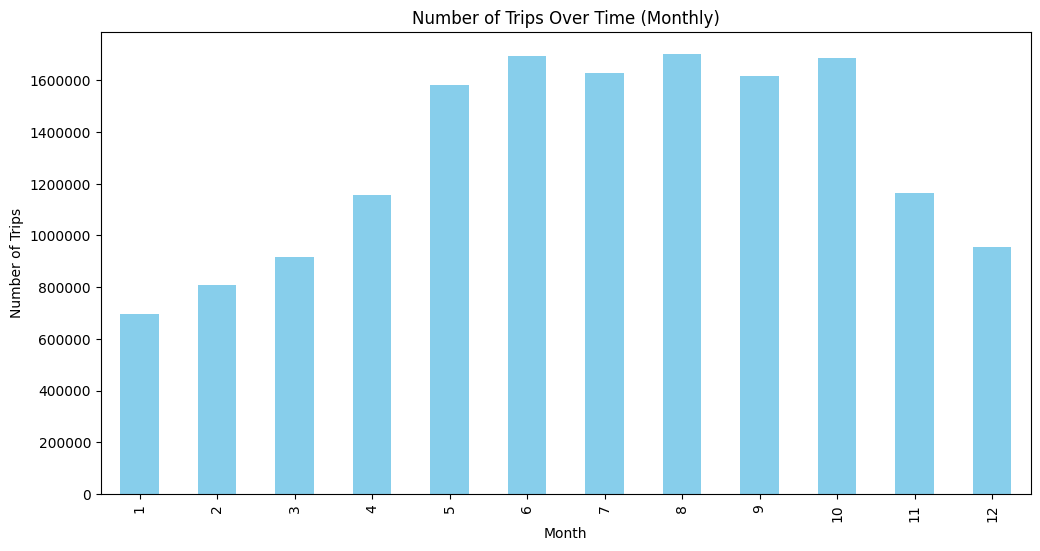

In [ ]:
subscriber_df = trips_df_datetimes[trips_df_datetimes['usertype']=='Subscriber']
monthly_counts = subscriber_df.resample('M').size()
monthly_counts.index = monthly_counts.index.month

plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Trips Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
# Get the current axis
ax = plt.gca()

formatter = ScalarFormatter()
formatter.set_scientific(False)

ax.yaxis.set_major_formatter(formatter)

plt.show()

We can observe that December, January and February were the least active months something that makes sense due to the cold in NYC.

In [ ]:
# We counted the occurancies of every start station and end station.
start_station_counts = trips_df_datetimes['start_station_id'].value_counts()
end_station_counts = trips_df_datetimes['end_station_id'].value_counts()

# We chose to plot only top 35 of them.
num_top_stations = 35

# We retrieved the top 35 ones.
top_start_stations = start_station_counts.head(num_top_stations)
top_end_stations = end_station_counts.head(num_top_stations)

top_start_station_incl_df = trips_df_datetimes[trips_df_datetimes['start_station_id'].isin(top_start_stations.index)]
top_end_station_incl_df = trips_df_datetimes[trips_df_datetimes['end_station_id'].isin(top_end_stations.index)]


In [ ]:
# Check our dataframe:
top_end_station_incl_df

,tripduration,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,age
starttime,,,,,,,,,,,,,
2018-01-01 13:50:57.434,970,2018-01-01 14:07:08.186,72,40.767272,-73.993929,505,40.749013,-73.988484,31956,Subscriber,1992,1,25
2018-01-01 15:33:30.182,723,2018-01-01 15:45:33.341,72,40.767272,-73.993929,3255,40.750585,-73.994685,32536,Subscriber,1969,1,48
2018-01-02 13:28:46.154,1058,2018-01-02 13:46:24.307,72,40.767272,-73.993929,523,40.754666,-73.991382,32617,Subscriber,1947,1,70
2018-01-02 13:54:11.646,256,2018-01-02 13:58:28.198,72,40.767272,-73.993929,514,40.760875,-74.002777,31095,Subscriber,1978,1,39
2018-01-02 15:25:00.541,724,2018-01-02 15:37:05.323,72,40.767272,-73.993929,490,40.751551,-73.993934,19512,Subscriber,1965,1,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:51:13.922,1027,2019-01-01 00:08:21.790,423,40.765849,-73.986905,285,40.734546,-73.990741,28510,Subscriber,1981,1,36
2018-12-31 23:55:06.991,734,2019-01-01 00:07:21.230,336,40.730477,-73.999061,379,40.749156,-73.991600,27111,Subscriber,1986,1,31
2018-12-31 23:55:44.307,2551,2019-01-01 00:38:15.782,3320,40.794067,-73.962868,2006,40.765909,-73.976342,16390,Customer,1969,0,48


In [ ]:
import folium

station_locations_df = top_start_station_incl_df[['start_station_id', 'start_station_latitude', 'start_station_longitude']].drop_duplicates()

# We se as center of the map the center of New York City
map_center = [40.7128, -74.0060]  

# We created the map object and then iterated through df 
map_stations = folium.Map(location=map_center, zoom_start=50)


# For start stations
for index, row in station_locations_df.iterrows():
    start_station_name = row['start_station_id']
    start_station_lat = row['start_station_latitude']
    start_station_lon = row['start_station_longitude']

    # Creates marker for each station
    folium.Marker(
        location=[float(start_station_lat), float(start_station_lon)],
        popup=start_station_name
    ).add_to(map_stations)

station_locations_df = top_end_station_incl_df[['end_station_id', 'end_station_latitude', 'end_station_longitude']].drop_duplicates()


# For end stations
for index, row in station_locations_df.iterrows():
    end_station_name = row['end_station_id']
    end_station_lat = row['end_station_latitude']
    end_station_lon = row['end_station_longitude']

    # Creates marker for each station (red colored)
    folium.Marker(
        location=[float(end_station_lat), float(end_station_lon)],
        popup=end_station_name,
        icon=folium.Icon(color='red', icon_size=(15,100))
    ).add_to(map_stations)

# Plot the map
map_stations

### Violin Plots

---

In [ ]:
# We further cut some outliers for better looking plots
u70_df = trips_df_datetimes[trips_df_datetimes['birth_year']>1953] # 2017 - 1953 = 64
low_duration_minutes_df = u70_df[u70_df['tripduration']<3600]

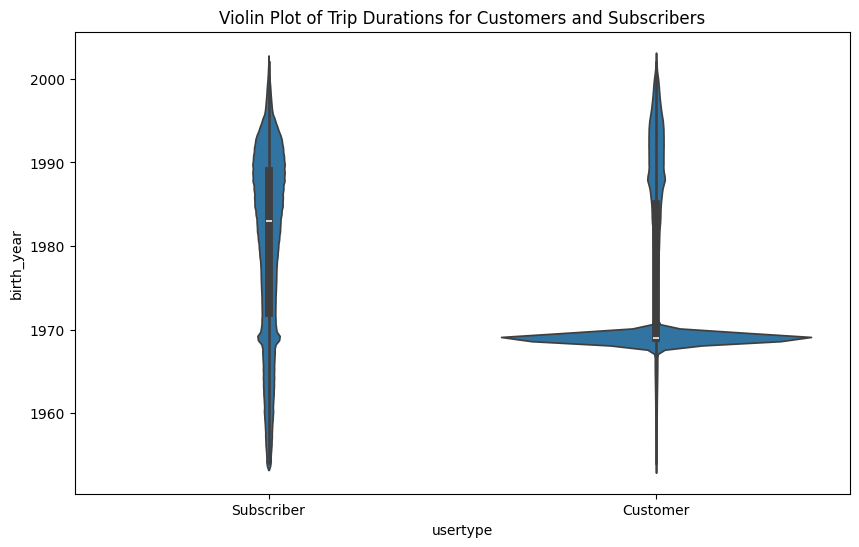

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='usertype', y='birth_year', data=u70_df)
plt.title('Violin Plot of Trip Durations for Customers and Subscribers')
plt.show()

This violin plot depicts average birth year of our user types. It is very apparent that the majority middle aged(~50 years old) users are just customers. Overall a safe assumption is that simple customers are just young or midle aged users.

---

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='usertype', y='tripduration', data=low_duration_minutes_df)
plt.title('Violin Plot of Trip Durations for Customers and Subscribers')
plt.show()

For the Violin plot of the trip duration along with the user's ages we also filtered the long rides(above 60 minutes). We proceed with this filtering without losing valuable insights, as more than 90 percent of our data are between this range, but at the same time it improved the readability of our plot. 

So the results of this plot are quite remarkable as Customers tend to make longer trips than the Subscribers do. As we can see the majority of subscribers tent to make trips with duration around 10 minutes, while customers' median trip duration is more than double. 

---

In [ ]:
# We further trim our df for better looking plots
mid_duration_minutes_df = u70_df[(u70_df['tripduration']>3600) & (u70_df['tripduration']< 24000)]

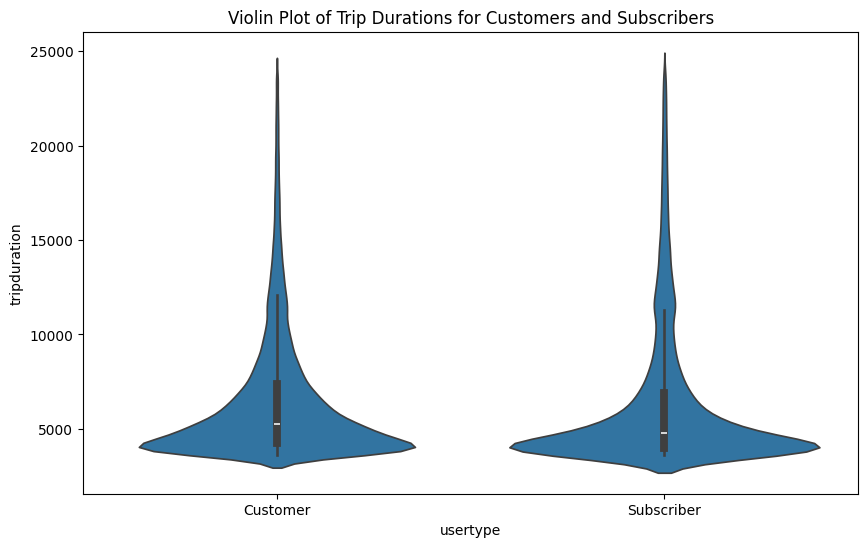

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='usertype', y='tripduration', data=mid_duration_minutes_df)
plt.title('Violin Plot of Trip Durations for Customers and Subscribers')
plt.show()

On trips with duration more than an hour, our plots look almost identical, meaning that we cannot exctract any usefull assumptions.
___


In [ ]:
stations_df = trips_df_datetimes.copy()

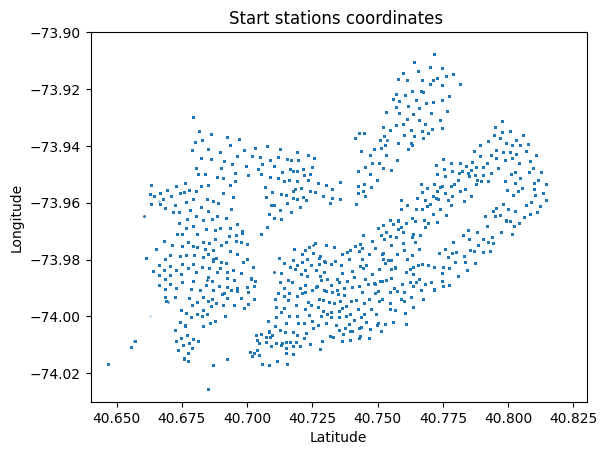

In [ ]:
plt.scatter(stations_df['start_station_latitude'], stations_df['start_station_longitude'], s=0.01)
plt.title('Start stations coordinates ')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.xlim(40.64, 40.83)
plt.ylim(-74.03, -73.9)
plt.show()

We are scaling the Data:
    Normalize or scale the latitude and longitude values, as clustering algorithms are distance-based.
We are using the K-means clustering algorithm with K = 20.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = stations_df[['start_station_latitude', 'start_station_longitude']]

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

k = 20  # number of clusters
kmeans = KMeans(n_clusters=k)

trips_df_datetimes['cluster'] = kmeans.fit_predict(data_scaled)


c:\Users\30694\Desktop\DTU\Year2\IBA\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\30694\Desktop\DTU\Year2\IBA\.venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\30694\Desktop\DTU\Year2\IBA\.venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


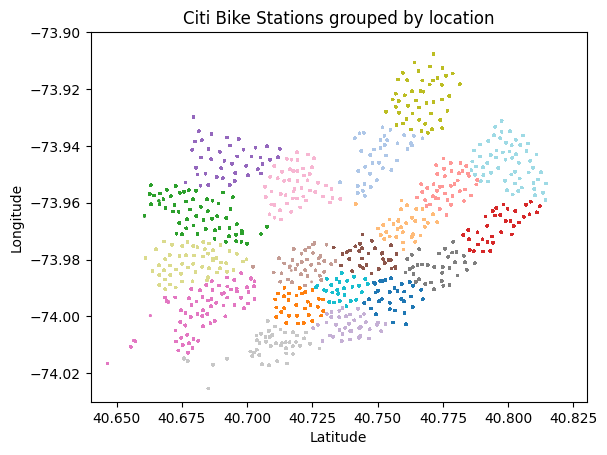

In [ ]:
import seaborn as sns
from matplotlib.colors import ListedColormap

# We will color each cluster
n_clusters = k
colors = ListedColormap(sns.color_palette("tab20", n_clusters))
centers = kmeans.cluster_centers_
plt.scatter(trips_df_datetimes['start_station_latitude'], trips_df_datetimes['start_station_longitude'], c=kmeans.labels_, cmap=colors, s=1)

# We will plot our cluster centers

plt.scatter(centers[:, 0], centers[:, 1], c=range(n_clusters), cmap=colors, s=50)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.xlim(40.64, 40.83)
plt.ylim(-74.03, -73.9)
plt.title('Citi Bike Stations grouped by location')

plt.show()

In [ ]:
# Count the number of stations in each cluster
cluster_counts = trips_df_datetimes['cluster'].value_counts()

demand_per_cluster = trips_df_datetimes[trips_df_datetimes['tripduration'] > 0]['cluster'].value_counts()

# Find the cluster with the highest demand
most_demand_cluster = demand_per_cluster.idxmax()
most_demand_count = demand_per_cluster.max()

print("Cluster with Highest Demand (in terms of trip initiations):", most_demand_cluster)
print("Number of Trip Initiations in Most Demand Cluster:", most_demand_count)

# Find the cluster with the lower demand
lower_demand_cluster = demand_per_cluster.idxmin()
lower_demand_count = demand_per_cluster.min()

print("Cluster with Lower Demand (in terms of trip initiations):", lower_demand_cluster)
print("Number of Trip Initiations in Lower Demand Cluster:", lower_demand_count)

Cluster with Highest Demand (in terms of trip initiations): 9
Number of Trip Initiations in Most Demand Cluster: 1695371
Cluster with Lower Demand (in terms of trip initiations): 5
Number of Trip Initiations in Lower Demand Cluster: 81


In [ ]:
trips_df_datetimes.head(10)

,tripduration,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,age,cluster
starttime,,,,,,,,,,,,,,
2018-01-01 13:50:57.434,970,2018-01-01 14:07:08.186,72,40.767272,-73.993929,505,40.749013,-73.988484,31956,Subscriber,1992,1,26,0
2018-01-01 15:33:30.182,723,2018-01-01 15:45:33.341,72,40.767272,-73.993929,3255,40.750585,-73.994685,32536,Subscriber,1969,1,49,0
2018-01-01 15:39:18.337,496,2018-01-01 15:47:35.172,72,40.767272,-73.993929,525,40.755942,-74.002116,16069,Subscriber,1956,1,62,0
2018-01-01 15:40:13.372,306,2018-01-01 15:45:20.191,72,40.767272,-73.993929,447,40.763707,-73.985162,31781,Subscriber,1974,1,44,0
2018-01-01 18:14:51.568,306,2018-01-01 18:19:57.642,72,40.767272,-73.993929,3356,40.774667,-73.984706,30319,Subscriber,1992,1,26,0
2018-01-01 21:31:54.192,1602,2018-01-01 21:58:36.353,72,40.767272,-73.993929,482,40.739355,-73.999318,30106,Subscriber,1968,1,50,0
2018-01-02 07:54:53.646,722,2018-01-02 08:06:55.872,72,40.767272,-73.993929,228,40.754601,-73.971879,32059,Subscriber,1978,1,40,0
2018-01-02 08:06:14.331,434,2018-01-02 08:13:28.767,72,40.767272,-73.993929,173,40.760683,-73.984527,30525,Subscriber,1983,1,35,0
2018-01-02 08:10:15.255,366,2018-01-02 08:16:21.896,72,40.767272,-73.993929,479,40.760193,-73.991255,27439,Subscriber,1974,1,44,0


In [ ]:
# export the results to a new dataset so we do not have to run the whole Notebook over and over again
trips_df_datetimes.to_csv('clustered_stations.csv', index=True)

---

## Start of prediction

In [ ]:
df = pd.read_csv("clustered_stations.csv")

In [ ]:
df.head(10)

,starttime,tripduration,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,age,cluster
0,2018-01-01 13:50:57.434,970,2018-01-01 14:07:08.186,72,40.767272,-73.993929,505,40.749013,-73.988484,31956,Subscriber,1992,1,26,0
1,2018-01-01 15:33:30.182,723,2018-01-01 15:45:33.341,72,40.767272,-73.993929,3255,40.750585,-73.994685,32536,Subscriber,1969,1,49,0
2,2018-01-01 15:39:18.337,496,2018-01-01 15:47:35.172,72,40.767272,-73.993929,525,40.755942,-74.002116,16069,Subscriber,1956,1,62,0
3,2018-01-01 15:40:13.372,306,2018-01-01 15:45:20.191,72,40.767272,-73.993929,447,40.763707,-73.985162,31781,Subscriber,1974,1,44,0
4,2018-01-01 18:14:51.568,306,2018-01-01 18:19:57.642,72,40.767272,-73.993929,3356,40.774667,-73.984706,30319,Subscriber,1992,1,26,0
5,2018-01-01 21:31:54.192,1602,2018-01-01 21:58:36.353,72,40.767272,-73.993929,482,40.739355,-73.999318,30106,Subscriber,1968,1,50,0
6,2018-01-02 07:54:53.646,722,2018-01-02 08:06:55.872,72,40.767272,-73.993929,228,40.754601,-73.971879,32059,Subscriber,1978,1,40,0
7,2018-01-02 08:06:14.331,434,2018-01-02 08:13:28.767,72,40.767272,-73.993929,173,40.760683,-73.984527,30525,Subscriber,1983,1,35,0
8,2018-01-02 08:10:15.255,366,2018-01-02 08:16:21.896,72,40.767272,-73.993929,479,40.760193,-73.991255,27439,Subscriber,1974,1,44,0
9,2018-01-02 08:13:30.896,324,2018-01-02 08:18:55.120,72,40.767272,-73.993929,450,40.762272,-73.987882,30892,Subscriber,1947,1,71,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17525144 entries, 0 to 17525143
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   starttime                object 
 1   tripduration             int64  
 2   stoptime                 object 
 3   start_station_id         int64  
 4   start_station_latitude   float64
 5   start_station_longitude  float64
 6   end_station_id           int64  
 7   end_station_latitude     float64
 8   end_station_longitude    float64
 9   bikeid                   int64  
 10  usertype                 object 
 11  birth_year               int64  
 12  gender                   int64  
 13  age                      int64  
 14  cluster                  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 2.0+ GB


Break the initial DataFrame to cluster DataFrames based on their cluster label

In [ ]:
clusters = df['cluster'].unique()
cluster_dfs = {}

for cluster in clusters:
    cluster_df = df[df['cluster'] == cluster].copy()
    cluster_dfs[cluster] = cluster_df


Iterate through the dictionary to find the longest cluster

In [ ]:
max_cluster_label = None
max_cluster_length = 0

for cluster_label, cluster_df in cluster_dfs.items():
    cluster_length = len(cluster_df)
    if cluster_length > max_cluster_length:
        max_cluster_length = cluster_length
        max_cluster_label = cluster_label

print(f"Cluster {max_cluster_label} is the longest with {max_cluster_length} rows.")

Cluster 9 is the longest with 1695371 rows.


In [ ]:
def create_data_start_and_stop(data: pd.DataFrame) -> (pd.DataFrame, pd.DataFrame):
    data["starttime"] = pd.to_datetime(data["starttime"])
    data["stoptime"] = pd.to_datetime(data["stoptime"])

    data_start = data[["starttime", "tripduration", "start_station_id"]]
    data_stop = data[["stoptime", "tripduration", "end_station_id"]]

    data_start["date"] = data_start["starttime"].dt.date
    data_stop["date"] = data_stop["stoptime"].dt.date   

    # Extract time-related features from 'starttime'
    data_start['hour'] = data_start["starttime"].dt.hour
    data_start['day'] = data_start["starttime"].dt.day
    data_start['month'] = data_start["starttime"].dt.month
    data_start = data_start.drop(columns=["starttime", "tripduration", "start_station_id"])

    data_stop['hour'] = data_stop["stoptime"].dt.hour
    data_stop['day'] = data_stop["stoptime"].dt.day
    data_stop['month'] = data_stop["stoptime"].dt.month
    data_stop = data_stop.drop(columns=["stoptime", "tripduration", "end_station_id"])

    return data_start, data_stop

The following code creates a df with pickups for every hour. Because some hours in the dataframe could be non existent (for example no data from 12.00 to 12.59 at 2018-01-09) we fill them with 0 pickups

In [ ]:
def create_pickups_df(data, target_name):
    # Group the data by 'hour', 'day', and 'month', and count the rows for each unique combination
    pickups = data.groupby(['date','hour', 'day', 'month']).size().reset_index(name=target_name)
    pickups = pickups.set_index("date")

    # Create a DataFrame with all possible combinations of 'hour,' 'day,' 'month' for 24 hours
    dates = pickups.index.unique()
    hours = range(24)

    date_hour_combinations = pd.DataFrame(
        [(date, hour) for date in dates for hour in hours ],
        columns=['date', 'hour']
    )

    date_hour_combinations['date'] = pd.to_datetime(date_hour_combinations['date'])
    date_hour_combinations['month'] = date_hour_combinations['date'].dt.month
    date_hour_combinations['day'] = date_hour_combinations['date'].dt.day

    # Set 'date' as the index
    date_hour_combinations['date'] = date_hour_combinations['date'].dt.date
    date_hour_combinations.set_index('date', inplace=True)

    combined_data = pd.merge(date_hour_combinations, pickups, on=['date', 'hour', 'day', 'month'], how='left')

    # Fill missing 'pickups' values with 0
    combined_data[target_name].fillna(0, inplace=True)

    return combined_data


Function taken from the course that builds lagged features for pickups/dropoffs.

In [ ]:
def buildLaggedFeatures(s, columns, lag=2, dropna=True):
    '''
    From http://stackoverflow.com/questions/20410312/how-to-create-a-lagged-data-structure-using-pandas-dataframe
    Builds a new DataFrame to facilitate regressing over all possible lagged features
    '''
    if type(s) is pd.DataFrame:
        new_dict={}
        for c in s.columns:
            new_dict[c]=s[c]
        for col_name in columns:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['lag_%s_%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        print('Only works for DataFrame or Series')
        return None
    if dropna:
        return res.dropna()
    else:
        return res 

The following function takes as argument a DataFrame, a list of training months and test months and a target name ('pickups' or 'dropoffs') and returns the Train and Test data ready to be used in the training loop.

In [ ]:
def prediction_preparation(df, train_months, test_months, target_name):
    lag_columns = [c for c in df.columns if c.startswith("lag")]
    X = df[['day','month','hour']+ lag_columns]
    y = df[['day','month','hour',target_name]]

    scaler = StandardScaler()
    
    X.loc[:, lag_columns] = scaler.fit_transform(X[lag_columns])

    X_train = X[X['month'].isin(train_months)]
    X_test = X[X['month'].isin(test_months)]
    y_train = y[y['month'].isin(train_months)]
    y_test = y[y['month'].isin(test_months)]

    return X_train, X_test, y_train, y_test

The following function acts as training loop. We give as args:
- the model, 
- the train and test data,
- the target name ("pickups" or "dropoffs") 

It trains the given model, evaluates it using Cross Validation method and finally tests it in not seen data (The test data).

In [ ]:
def training_loop(model, X_train, y_train, X_test, y_test, target_name):
    CV_months = [] 
    CV_score = [] 
    CV_RMSE = [] 
    # Loop over unique days in the training data
    for month in X_train['month'].unique()[:-1]:
        CV_months.append(month)
        print("--------------------------------------")
        print(f"Month : {month} \n")
        xtemp_train = X_train[X_train['month'].isin(CV_months)]
        ytemp_train = y_train[y_train['month'].isin(CV_months)][target_name]
        xtemp_test = X_train[X_train['month']==month+1]
        ytemp_test = y_train[y_train['month']==month+1][target_name]

        # Fit the model on the training data
        model.fit(xtemp_train, ytemp_train)

        # Make predictions on the training and temporary test data
        train_temp_preds = model.predict(xtemp_train)
        test_temp_preds = model.predict(xtemp_test)

        print('Train Score: ',  model.score(xtemp_train, ytemp_train))
        print('Train RMSE : ',  np.sqrt(mean_squared_error(ytemp_train, train_temp_preds)))
        print('Test Score: ',  model.score(xtemp_test, ytemp_test))
        print('Test RMSE : ',  np.sqrt(mean_squared_error(ytemp_test, test_temp_preds)))

        CV_score.append(model.score(xtemp_test, ytemp_test))
        CV_RMSE.append(np.sqrt(mean_squared_error(ytemp_test, test_temp_preds)))
            
    model.fit(X_train, y_train[target_name])
    test_score = model.score(X_test, y_test[target_name])
    test_RMSE = np.sqrt(mean_squared_error(y_test[target_name], model.predict(X_test)))
    test_preds = model.predict(X_test)
    CV_avg_score = sum(CV_score)/len(CV_score)
    CV_avg_RMSE = sum(CV_RMSE)//len(CV_RMSE)

    print("--------------------------------------")
    print(f"Final Test Score {test_score}       \nFinal Test RMSE {test_RMSE}")


    return CV_avg_score, CV_avg_RMSE, test_score, test_RMSE, test_preds

In [ ]:
data = cluster_dfs[max_cluster_label]

data_start, data_stop = create_data_start_and_stop(data)
combined_pickup_data = create_pickups_df(data_start, 'pickups')
combined_dropoff_data = create_pickups_df(data_stop, 'dropoffs')

pickups_lagged = buildLaggedFeatures(s=combined_pickup_data, columns= ['pickups'], lag = 4, dropna=False)
pickups_lagged = pickups_lagged.apply(lambda row: row.fillna(0))

dropoffs_lagged = buildLaggedFeatures(s=combined_dropoff_data, columns= ['dropoffs'], lag = 4, dropna=False)
dropoffs_lagged = dropoffs_lagged.apply(lambda row: row.fillna(0))

train_months = [1,2,3,4,5,6,7,8,9,10]
test_months =  [11,12]

lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
model_list = [lr_model, rf_model]

table = []
titles = ["Model", "Target", "Final Test Score", "Final Test RMSE", "Average CV score", "Average CV RMSE"]
table.append(titles)

prediction_dfs = []

for model in model_list:
    prediction_df = combined_pickup_data.drop(columns=['pickups'])
    prediction_df = prediction_df[prediction_df['month'].isin(test_months)] 
    for df in [pickups_lagged, dropoffs_lagged]:
        target_name = 'pickups' if 'pickups' in df.columns else 'dropoffs'
        X_train, X_test, y_train, y_test = prediction_preparation(df, train_months, test_months, target_name)
        # -------- Task 2 ------- #
        CV_score, CV_RMSE, test_score, test_RMSE, preds = training_loop(model, X_train, y_train, X_test, y_test, target_name)
        row = [model, target_name, test_score, test_RMSE, CV_score, CV_RMSE]
        table.append(row)
        # -------- Task 3 ------- #
        prediction_df[target_name] = preds
    prediction_dfs.append(prediction_df)


C:\Users\30694\AppData\Local\Temp\ipykernel_20640\2978950130.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_start["date"] = data_start["starttime"].dt.date
C:\Users\30694\AppData\Local\Temp\ipykernel_20640\2978950130.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stop["date"] = data_stop["stoptime"].dt.date
C:\Users\30694\AppData\Local\Temp\ipykernel_20640\2978950130.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

--------------------------------------
Month : 1 

Train Score:  0.8212916396236778
Train RMSE :  37.96846002271685
Test Score:  0.7954443394217965
Test RMSE :  50.73187356994956
--------------------------------------
Month : 2 

Train Score:  0.8147463746721998
Train RMSE :  43.94201725605056
Test Score:  0.8027483528776096
Test RMSE :  51.800902702055104
--------------------------------------
Month : 3 

Train Score:  0.8133125428371155
Train RMSE :  46.59145379520222
Test Score:  0.8473028223022288
Test RMSE :  59.69012461542872
--------------------------------------
Month : 4 

Train Score:  0.833897075301036
Train RMSE :  50.09608999983229
Test Score:  0.8117955740206866
Test RMSE :  83.9509016917403
--------------------------------------
Month : 5 

Train Score:  0.8390003881402909
Train RMSE :  58.53750578174195
Test Score:  0.8371291454175941
Test RMSE :  81.34355515573233
--------------------------------------
Month : 6 

Train Score:  0.8501641643250321
Train RMSE :  62.82917

In [ ]:
print(tabulate(table, headers='firstrow',colalign=("left",), floatfmt=".4f"))

Model                                   Target      Final Test Score    Final Test RMSE    Average CV score    Average CV RMSE
--------------------------------------  --------  ------------------  -----------------  ------------------  -----------------
LinearRegression()                      pickups               0.7156            71.5561              0.8239            73.0000
LinearRegression()                      dropoffs              0.7357            68.4921              0.8354            70.0000
RandomForestRegressor(random_state=42)  pickups               0.9153            39.0398              0.9163            48.0000
RandomForestRegressor(random_state=42)  dropoffs              0.9089            40.2058              0.9193            47.0000


----------------------- M O D E L 1 --------------------------------
For date: 2018-11-01 Cluster: 9 needs -34 bikes.
For date: 2018-11-02 Cluster: 9 needs 19 bikes.
For date: 2018-11-03 Cluster: 9 needs 14 bikes.
For date: 2018-11-04 Cluster: 9 needs -5 bikes.
For date: 2018-11-05 Cluster: 9 needs 12 bikes.
For date: 2018-11-06 Cluster: 9 needs 6 bikes.
For date: 2018-11-07 Cluster: 9 needs -1 bikes.
For date: 2018-11-08 Cluster: 9 needs 3 bikes.
For date: 2018-11-09 Cluster: 9 needs -12 bikes.
For date: 2018-11-10 Cluster: 9 needs 16 bikes.
For date: 2018-11-11 Cluster: 9 needs 19 bikes.
For date: 2018-11-12 Cluster: 9 needs -12 bikes.
For date: 2018-11-13 Cluster: 9 needs 16 bikes.
For date: 2018-11-14 Cluster: 9 needs -13 bikes.
For date: 2018-11-15 Cluster: 9 needs 17 bikes.
For date: 2018-11-16 Cluster: 9 needs -7 bikes.
For date: 2018-11-17 Cluster: 9 needs 21 bikes.
For date: 2018-11-18 Cluster: 9 needs -6 bikes.
For date: 2018-11-19 Cluster: 9 needs 15 bikes.
For date: 2018-11

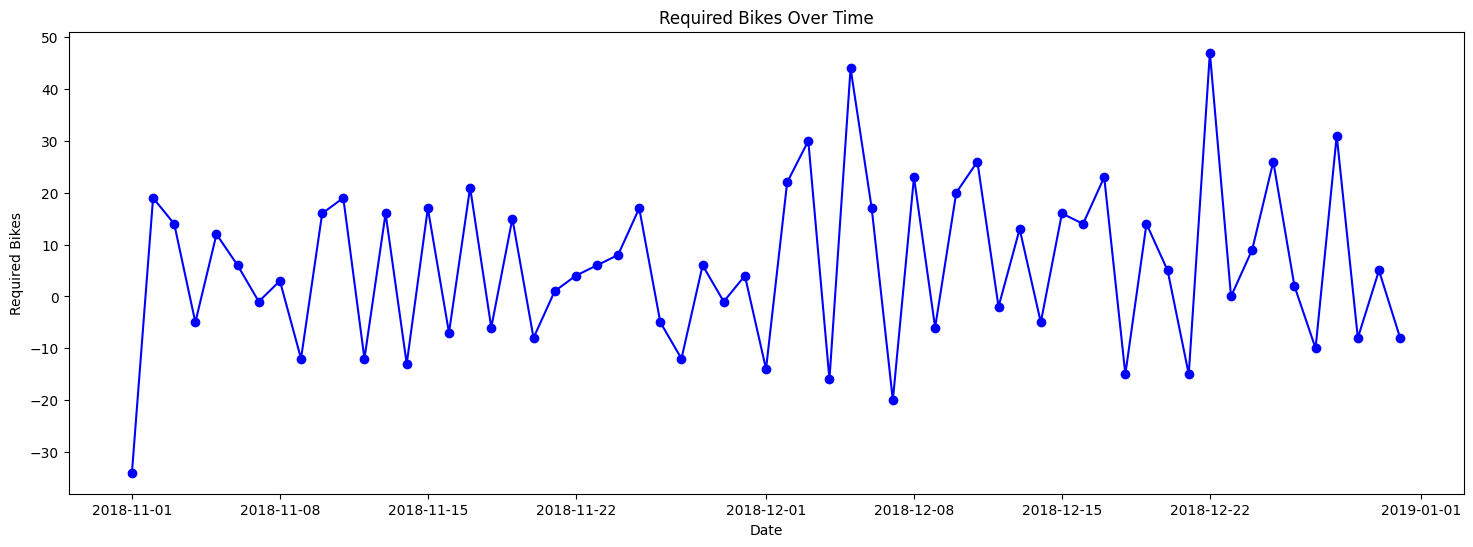

----------------------- M O D E L 2 --------------------------------
For date: 2018-11-01 Cluster: 9 needs -42 bikes.
For date: 2018-11-02 Cluster: 9 needs 2 bikes.
For date: 2018-11-03 Cluster: 9 needs -46 bikes.
For date: 2018-11-04 Cluster: 9 needs -262 bikes.
For date: 2018-11-05 Cluster: 9 needs 77 bikes.
For date: 2018-11-06 Cluster: 9 needs 70 bikes.
For date: 2018-11-07 Cluster: 9 needs 112 bikes.
For date: 2018-11-08 Cluster: 9 needs 155 bikes.
For date: 2018-11-09 Cluster: 9 needs -110 bikes.
For date: 2018-11-10 Cluster: 9 needs 154 bikes.
For date: 2018-11-11 Cluster: 9 needs -272 bikes.
For date: 2018-11-12 Cluster: 9 needs -126 bikes.
For date: 2018-11-13 Cluster: 9 needs 27 bikes.
For date: 2018-11-14 Cluster: 9 needs -26 bikes.
For date: 2018-11-15 Cluster: 9 needs 101 bikes.
For date: 2018-11-16 Cluster: 9 needs 170 bikes.
For date: 2018-11-17 Cluster: 9 needs 30 bikes.
For date: 2018-11-18 Cluster: 9 needs -72 bikes.
For date: 2018-11-19 Cluster: 9 needs 21 bikes.
For

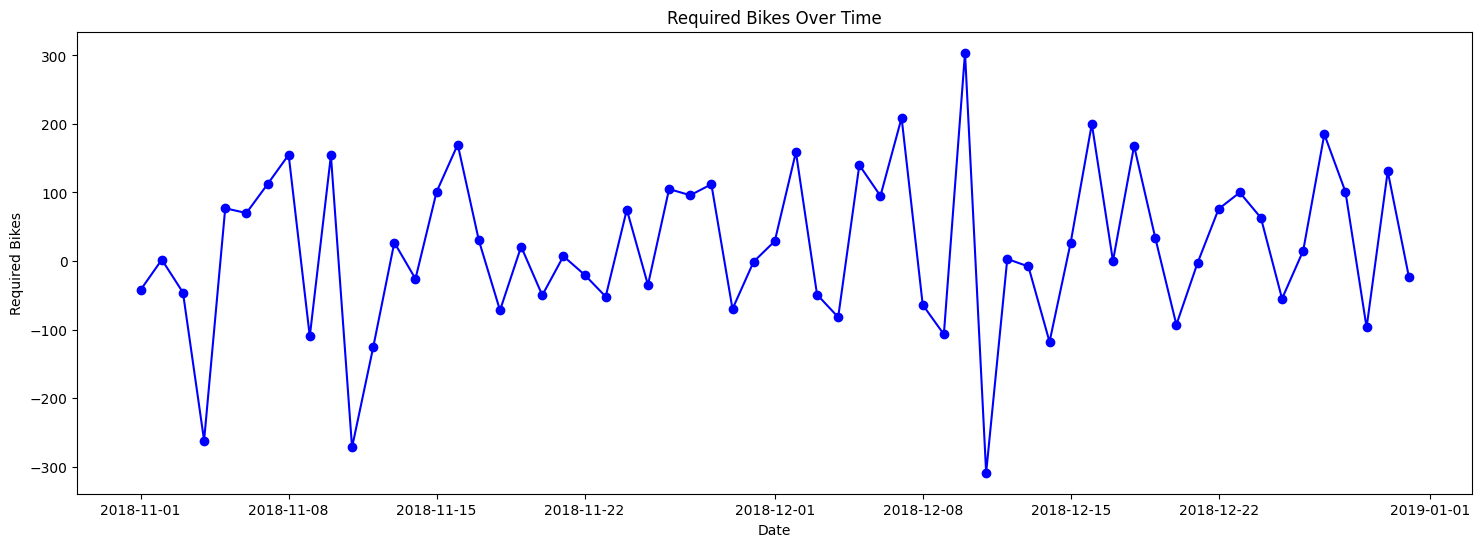

In [ ]:
i = 0
for prediction_df in prediction_dfs:
    i = i+1
    print(f"----------------------- M O D E L {i} --------------------------------")
    prediction_df['pickups'] = prediction_df['pickups'].astype(int)
    prediction_df['dropoffs'] = prediction_df['dropoffs'].astype(int)
    # Calculate daily cumulative arrivals and departures
    prediction_df['daily_cumulative_arrivals'] = prediction_df.groupby('day')['dropoffs'].transform('cumsum')
    prediction_df['daily_cumulative_departures'] = prediction_df.groupby('day')['pickups'].transform('cumsum')

    daily_cumulative = prediction_df.groupby(prediction_df.index)[['daily_cumulative_arrivals', 'daily_cumulative_departures']].last()
    daily_cumulative['required_bikes'] = daily_cumulative['daily_cumulative_departures'] - daily_cumulative['daily_cumulative_arrivals']
    
    for date in daily_cumulative.index:
        print(f"For date: {date} Cluster: {max_cluster_label} needs {daily_cumulative.loc[date, 'required_bikes']} bikes.")
    
    %matplotlib inline
    fig, ax = plt.subplots(figsize=(18, 6))
    daily_cumulative['required_bikes'].plot(marker='o', linestyle='-', color='b', ax=ax)
    ax.set_xlabel('Date')
    ax.set_ylabel('Required Bikes')
    ax.set_title('Required Bikes Over Time')
    plt.show()
    

##### End of prediction challenge

---

## Exploratory Analysis

In [ ]:
df = pd.read_csv("clustered_stations.csv")

We repeat the same procedure (that we performed at prediction) to get the data ready again!

In [ ]:
clusters = df['cluster'].unique()
cluster_dfs = {}

for cluster in clusters:
    cluster_df = df[df['cluster'] == cluster].copy()
    cluster_dfs[cluster] = cluster_df

max_cluster_label = None
max_cluster_length = 0

for cluster_label, cluster_df in cluster_dfs.items():
    cluster_length = len(cluster_df)
    if cluster_length > max_cluster_length:
        max_cluster_length = cluster_length
        max_cluster_label = cluster_label

print(f"Cluster {max_cluster_label} is the longest with {max_cluster_length} rows.")

We import our weather data. (to xei etoimo giorgos)

In [ ]:
weather_data = pd.read_csv(r'C:\Users\Ioannis\Desktop\BA\Project\wd\hourly_dataa.csv')

In [ ]:
weather_data['date'] = pd.to_datetime(weather_data['date'], format='%Y-%m-%d %H:%M:%S')

df1 = weather_data.copy()

In [ ]:
def wet_dat(data: pd.DataFrame) -> (pd.DataFrame, pd.DataFrame):
    data["date"] = pd.to_datetime(data["date"], errors='coerce')
    
    data_start = data[["date","temperature_2m", "apparent_temperature", "snow_depth","precipitation", "rain", "snowfall", "wind_speed_10m","relative_humidity_2m", "wind_gusts_10m", "soil_temperature_0_to_7cm", "soil_moisture_0_to_7cm"]]
    
    data_start['date'] = pd.to_datetime(data_start['date'])
    data_start['hour'] = data_start['date'].apply(lambda x: x.hour)
    data_start['day'] = data_start['date'].apply(lambda x: x.day)
    data_start['month'] = data_start['date'].apply(lambda x: x.month)
    data_start["date"] = data_start["date"].dt.date
    
    return data_start

In [ ]:
#create a plot for humidity and temperature
def plot_hum_temp(data: pd.DataFrame):
    fig, ax1 = plt.subplots(figsize=(20,10))
    color = 'tab:red'
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('soil_moisture_0_to_7cm', color=color)
    ax1.plot(data['date'], data['pickups'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_title('Humidity and Temperature')
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('temperature', color=color)  # we already handled the x-label with ax1
    ax2.plot(data['date'], data['soil_temperature_0_to_7cm'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

In [ ]:
d = wet_dat(weather_data)

d.head(10)

,date,temperature_2m,apparent_temperature,snow_depth,precipitation,rain,snowfall,wind_speed_10m,relative_humidity_2m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm,hour,day,month
0,2018-01-01,9.608500,0.00,20.945070,0.2,0.2,0.0,20.945070,5.590458,79.078636,41.399998,7.8585,5,1,1
1,2018-01-01,9.258500,0.00,21.868332,0.1,0.1,0.0,21.868332,5.027298,79.026760,37.079998,7.6585,6,1,1
2,2018-01-01,8.808500,0.00,22.972400,0.0,0.0,0.0,22.972400,4.098280,73.386070,39.600000,7.4585,7,1,1
3,2018-01-01,8.008500,0.00,25.199997,0.0,0.0,0.0,25.199997,2.933147,76.395220,42.480000,7.1085,8,1,1
4,2018-01-01,8.158501,0.00,27.162708,0.0,0.0,0.0,27.162708,2.631478,71.230194,46.440000,7.1085,9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2018-02-11,1.708500,0.01,17.399586,0.0,0.0,0.0,17.399586,-2.898066,90.748886,33.120000,0.4585,16,11,2
996,2018-02-11,1.508500,0.01,15.175612,0.0,0.0,0.0,15.175612,-2.812892,90.406395,29.160000,0.4585,17,11,2
997,2018-02-11,0.958500,0.01,13.779114,0.0,0.0,0.0,13.779114,-3.220650,91.356470,25.560000,0.4085,18,11,2
998,2018-02-11,0.858500,0.01,12.904882,0.0,0.0,0.0,12.904882,-3.200732,91.682526,23.039999,0.4085,19,11,2


In [ ]:
data = cluster_dfs[max_cluster_label]
data_start, data_stop = create_data_start_and_stop(data)
combined_pickup_data = create_pickups_df(data_start, 'pickups')
combined_dropoff_data = create_pickups_df(data_stop, 'dropoffs')

C:\Users\Ioannis\AppData\Local\Temp\ipykernel_19512\2978950130.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_start["date"] = data_start["starttime"].dt.date
C:\Users\Ioannis\AppData\Local\Temp\ipykernel_19512\2978950130.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stop["date"] = data_stop["stoptime"].dt.date
C:\Users\Ioannis\AppData\Local\Temp\ipykernel_19512\2978950130.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [ ]:
#merge weather data with pdata
combined_datap = pd.merge(combined_pickup_data, d, on=['date', 'hour', 'day', 'month'], how='left')
combined_datad = pd.merge(combined_dropoff_data, d, on=['date', 'hour', 'day', 'month'], how='left')



In [ ]:
#remove all the rows with NaN values
combined_datap = combined_datap.dropna()
combined_datad = combined_datad.dropna()

In [ ]:
#add a column isweekend
combined_datap['isweekend'] = combined_datap['date'].apply(lambda x: 1 if x.weekday() > 4 else 0)
combined_datad['isweekend'] = combined_datad['date'].apply(lambda x: 1 if x.weekday() > 4 else 0)

In [ ]:
hol = pd.read_csv(r'C:\Users\Ioannis\Desktop\BA\Project\pub_holidays.csv')

In [ ]:
#i want my date column to be datetime
hol['Date'] = pd.to_datetime(hol['Date'] + ' 2018', format='%d %b %Y')

In [ ]:
combined_datad['date'] = pd.to_datetime(combined_datad['date']) 
combined_datap['date'] = pd.to_datetime(combined_datap['date'])

In [ ]:
#creatre a column isholiday
combined_datap['isholiday'] = combined_datap['date'].apply(lambda x: 1 if x in hol['Date'].values else 0)
combined_datad['isholiday'] = combined_datad['date'].apply(lambda x: 1 if x in hol['Date'].values else 0)

In [ ]:
#i want the avg trip count on weekend and weekdays
weekend = combined_datap[combined_datap['isweekend'] == 1]
weekday = combined_datap[combined_datap['isweekend'] == 0]


In [ ]:

weekend.set_index('date', inplace=True)
weekend.loc[:, 'pickups'] = weekend['pickups'].sum()
average_pickups_weekend = weekend['pickups'][0] / len(weekend)
print(average_pickups_weekend)


134.10817307692307


In [ ]:

weekday.set_index('date', inplace=True)
weekday.loc[:, 'pickups'] = weekday['pickups'].sum()
average_pickups_weekday = weekday['pickups'][0] / len(weekday)
print(average_pickups_weekday)


206.2364594983224


The following code creates a df with pickups for every hour. Because some hours in the dataframe could be non existent (for example no data from 12.00 to 12.59 at 2018-01-09) we fill them with 0 pickups

In [ ]:
def plot_temp_pickups(data: pd.DataFrame):
    data['datetime'] = pd.to_datetime(data['date'])
    data.set_index('datetime', inplace=True)

    #sum all the pickups per day
    data['pickups'] = data['pickups'].resample('D').sum()

    data.reset_index(inplace=True)
    #data.drop('datetime',axis=1, inplace=True)
    fig, ax1 = plt.subplots(figsize=(20,10))
    color = 'tab:red'
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('pickups', color=color)
    ax1.plot(data['date'], data['pickups'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_title('Temperature and Pickups')
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('temperature', color=color)  # we already handled the x-label with ax1
    ax2.plot(data['date'], data['temperature_2m'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show() 

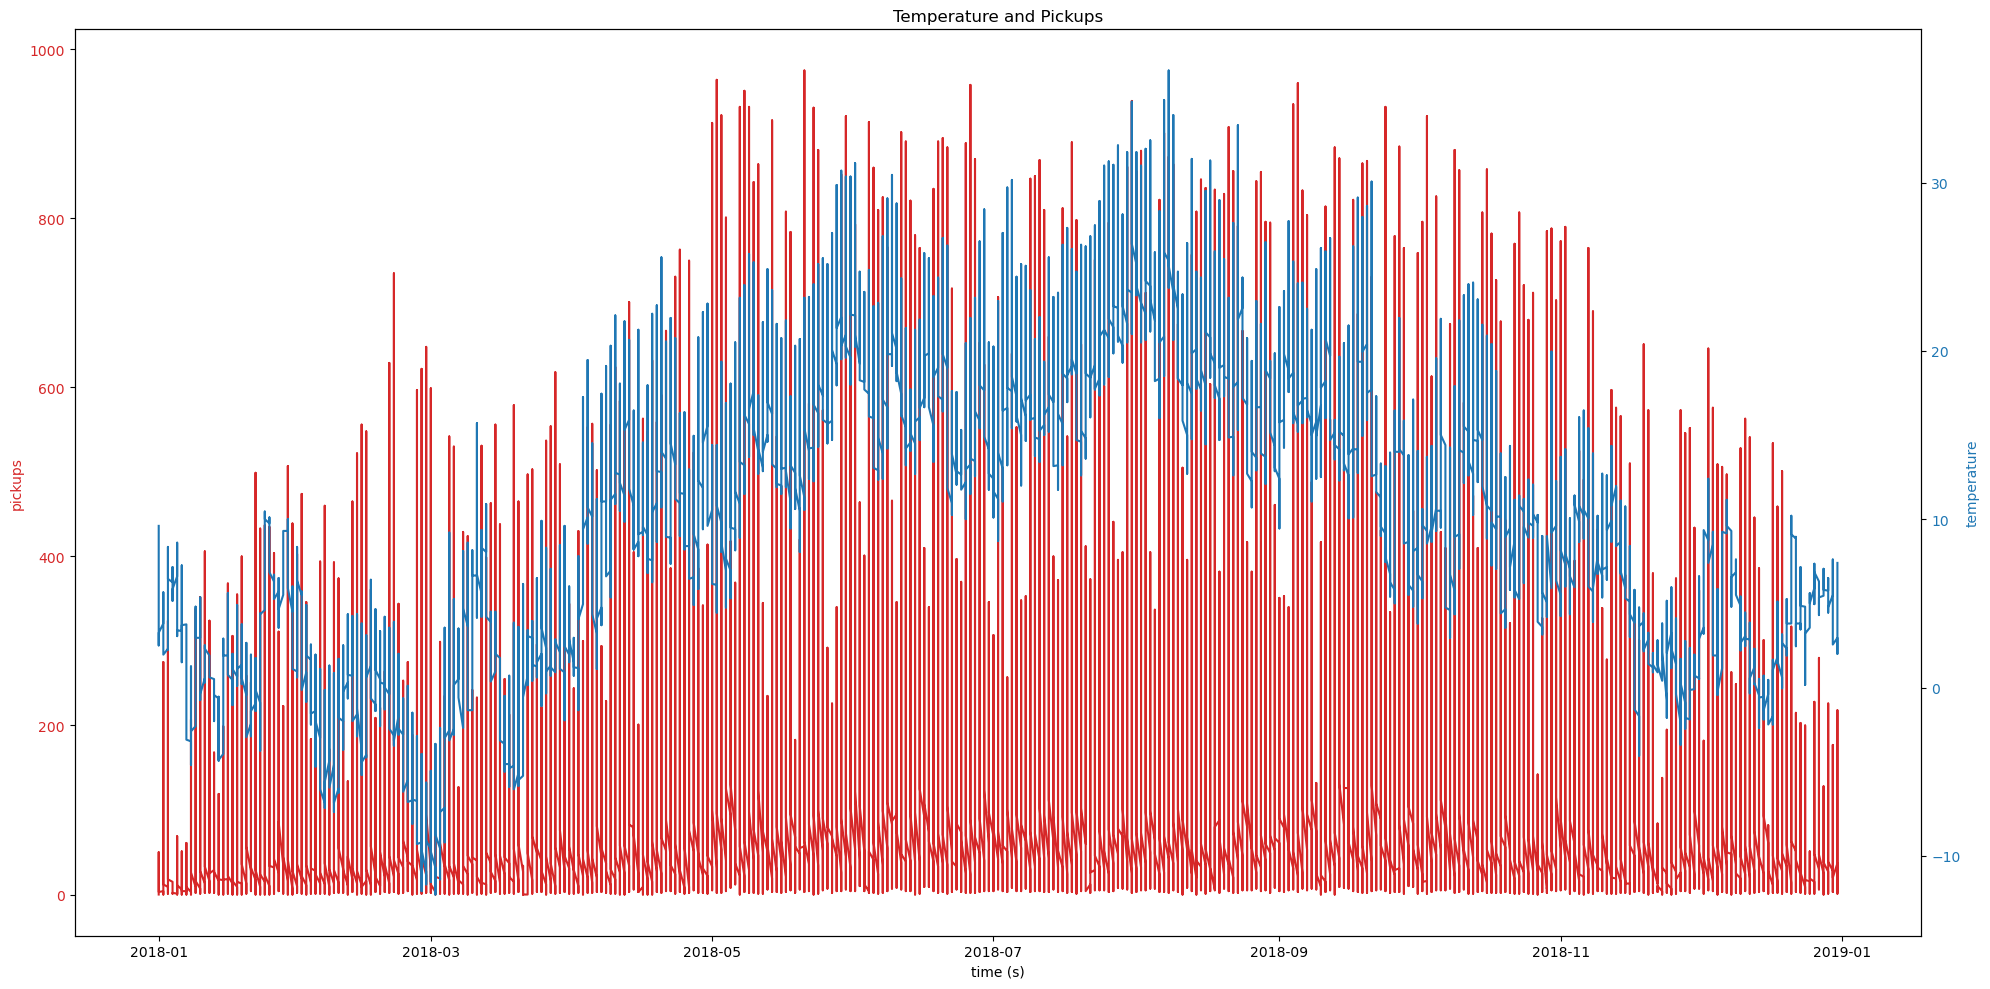

In [ ]:
plot_temp_pickups(combined_datap)

The following function takes as argument a DataFrame, a list of training months and test months and a target name ('pickups' or 'dropoffs') and returns the Train and Test data ready to be used in the training loop.

In [ ]:
def prediction_preparation(df, train_months, test_months, target_name):
    lag_columns = [c for c in df.columns if c.startswith("lag")]
    X = df[['day','month','hour', "temperature_2m","soil_moisture_0_to_7cm","isweekend",'isholiday']+ lag_columns]
    y = df[['day','month','hour',target_name]]

    scaler = StandardScaler()
    
    X.loc[:, lag_columns] = scaler.fit_transform(X[lag_columns])

    X_train = X[X['month'].isin(train_months)]
    X_test = X[X['month'].isin(test_months)]
    y_train = y[y['month'].isin(train_months)]
    y_test = y[y['month'].isin(test_months)]

    return X_train, X_test, y_train, y_test

The following function acts as training loop. We give as args:
- the model, 
- the train and test data,
- the target name ("pickups" or "dropoffs") 

It trains the given model, evaluates it using Cross Validation method and finally tests it in not seen data (The test data).

In [ ]:
pickups_lagged = buildLaggedFeatures(s=combined_datap, columns= ['pickups'], lag = 4, dropna=False)
pickups_lagged = pickups_lagged.apply(lambda row: row.fillna(0))

dropoffs_lagged = buildLaggedFeatures(s=combined_datad, columns= ['dropoffs'], lag = 4, dropna=False)
dropoffs_lagged = dropoffs_lagged.apply(lambda row: row.fillna(0))

train_months = [1,2,3,4,5,6,7,8,9,10]
test_months =  [11,12]

from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
xgb_model = XGBRegressor(subsample= 0.8, n_estimators = 300, min_child_weight = 3, max_depth = 4, learning_rate = 0.1, gamma = 1, colsample_bytree = 0.9)




from lightgbm import LGBMRegressor
lgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=2, random_state=42)

from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)

lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
model_list = [lr_model, rf_model,xgb_model]

table = []
titles = ["Model", "Target", "Final Test Score", "Final Test RMSE", "Average CV score", "Average CV RMSE"]
table.append(titles)

prediction_dfs = []

for model in model_list:
    prediction_df = combined_pickup_data.drop(columns=['pickups'])
    prediction_df = prediction_df[prediction_df['month'].isin(test_months)] 
    for df in [pickups_lagged, dropoffs_lagged]:
        target_name = 'pickups' if 'pickups' in df.columns else 'dropoffs'
        X_train, X_test, y_train, y_test = prediction_preparation(df, train_months, test_months, target_name)
        # -------- Task 2 ------- #
        CV_score, CV_RMSE, test_score, test_RMSE, preds = training_loop(model, X_train, y_train, X_test, y_test, target_name)
        row = [model, target_name, test_score, test_RMSE, CV_score, CV_RMSE]
        table.append(row)
        # -------- Task 3 ------- #
        prediction_df[target_name] = preds
    prediction_dfs.append(prediction_df)


C:\Users\Ioannis\AppData\Local\Temp\ipykernel_19512\2978950130.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_start["date"] = data_start["starttime"].dt.date
C:\Users\Ioannis\AppData\Local\Temp\ipykernel_19512\2978950130.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stop["date"] = data_stop["stoptime"].dt.date
C:\Users\Ioannis\AppData\Local\Temp\ipykernel_19512\2978950130.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

--------------------------------------
Month : 1 

Train Score:  0.8491694707111818
Train RMSE :  40.23349757436524
Test Score:  0.8345520945561087
Test RMSE :  53.809713291120794
--------------------------------------
Month : 2 

Train Score:  0.8474492728798635
Train RMSE :  46.5993391448378
Test Score:  0.8346064329315028
Test RMSE :  53.484643925020094
--------------------------------------
Month : 3 

Train Score:  0.8470719469945377
Train RMSE :  48.47607623078088
Test Score:  0.8382194834984188
Test RMSE :  63.91391026849608
--------------------------------------
Month : 4 

Train Score:  0.8483441691977998
Train RMSE :  52.60756209416169
Test Score:  0.8207411431828555
Test RMSE :  92.19592024248682
--------------------------------------
Month : 5 

Train Score:  0.8485250194850911
Train RMSE :  62.55377696963131
Test Score:  0.823474699582771
Test RMSE :  89.46991988595414
--------------------------------------
Month : 6 

Train Score:  0.8485807207260792
Train RMSE :  67.6701

In [ ]:
print(tabulate(table, headers='firstrow',colalign=("left",), floatfmt=".4f"))

Model                                                                         Target      Final Test Score    Final Test RMSE    Average CV score    Average CV RMSE
----------------------------------------------------------------------------  --------  ------------------  -----------------  ------------------  -----------------
LinearRegression()                                                            pickups               0.8400            57.4544              0.8228            78.0000
LinearRegression()                                                            dropoffs              0.8367            57.7407              0.8313            76.0000
RandomForestRegressor(random_state=42)                                        pickups               0.9186            40.9721              0.9197            50.0000
RandomForestRegressor(random_state=42)                                        dropoffs              0.9405            34.8466              0.9308            46.0000
XGBRegress

---

## Exploratory Part 2

### Toronto

In [ ]:
df = pd.read_csv("clustered_stations.csv")
df23 = pd.read_csv(r"C:\Users\Ioannis\Desktop\BA\Project\toronto bikeshare-ridership-2018\bikeshare2018\olakalaclustered.csv")

In [ ]:
#create a datetime column from starttime
df23['datetime'] = pd.to_datetime(df23['starttime'])
df['datetime'] = pd.to_datetime(df['starttime'])



In [ ]:
#put is weekend column on my dataframe
df['is_weekend'] = df['datetime'].apply(lambda x: 1 if x.weekday() > 4 else 0)

#put is weekend column on my dataframe23
df23['is_weekend'] = df23['datetime'].apply(lambda x: 1 if x.weekday() > 4 else 0)

In [ ]:
df23.head(10)
#rename endtime to stoptime
df23.rename(columns={'endtime':'stoptime'}, inplace=True)

In [ ]:
#rename from_station_id to start_station_id
df23.rename(columns={'from_station_id':'start_station_id'}, inplace=True)
#rename to_station_id to end_station_id
df23.rename(columns={'to_station_id':'end_station_id'}, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439956 entries, 0 to 439955
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Unnamed: 0               439956 non-null  int64         
 1   starttime                439956 non-null  object        
 2   start_station_id         439956 non-null  int64         
 3   stoptime                 439956 non-null  object        
 4   end_station_id           439956 non-null  int64         
 5   user_type                439956 non-null  object        
 6   start_station_latitude   439956 non-null  float64       
 7   start_station_longitude  439956 non-null  float64       
 8   end_station_latitude     439956 non-null  float64       
 9   end_station_longitude    439956 non-null  float64       
 10  cluster                  439956 non-null  int64         
 11  datetime                 439956 non-null  datetime64[ns]
 12  is_weekend      

Break the initial DataFrame to cluster DataFrames based on their cluster label

In [ ]:
clusters23 = df23['cluster'].unique()
cluster_dfs23 = {}

for cluster in clusters23:
    cluster_df = df23[df23['cluster'] == cluster].copy()
    cluster_dfs23[cluster] = cluster_df


In [ ]:
clusters = df['cluster'].unique()
cluster_dfs = {}

for cluster in clusters:
    cluster_df = df[df['cluster'] == cluster].copy()
    cluster_dfs[cluster] = cluster_df


Iterate through the dictionary to find the longest cluster

In [ ]:
max_cluster_label23 = None
max_cluster_length23 = 0

for cluster_label, cluster_df in cluster_dfs23.items():
    cluster_length = len(cluster_df)
    if cluster_length > max_cluster_length23:
        max_cluster_length23 = cluster_length
        max_cluster_label23 = cluster_label

print(f"Cluster {max_cluster_label23} is the longest with {max_cluster_length23} rows.")

Cluster 14 is the longest with 55527 rows.


In [ ]:
max_cluster_label = None
max_cluster_length = 0

for cluster_label, cluster_df in cluster_dfs.items():
    cluster_length = len(cluster_df)
    if cluster_length > max_cluster_length:
        max_cluster_length = cluster_length
        max_cluster_label = cluster_label

print(f"Cluster {max_cluster_label} is the longest with {max_cluster_length} rows.")

Cluster 1 is the longest with 1625611 rows.


In [ ]:
def create_data_start_and_stop(data: pd.DataFrame) -> (pd.DataFrame, pd.DataFrame):
    data["starttime"] = pd.to_datetime(data["starttime"])
    data["stoptime"] = pd.to_datetime(data["stoptime"])

    data_start = data[["starttime", "start_station_id"]]
    data_stop = data[["stoptime",  "end_station_id"]]

    data_start["date"] = data_start["starttime"].dt.date
    data_stop["date"] = data_stop["stoptime"].dt.date   

    # Extract time-related features from 'starttime'
    data_start['hour'] = data_start["starttime"].dt.hour
    data_start['day'] = data_start["starttime"].dt.day
    data_start['month'] = data_start["starttime"].dt.month
    data_start = data_start.drop(columns=["starttime",  "start_station_id"])

    data_stop['hour'] = data_stop["stoptime"].dt.hour
    data_stop['day'] = data_stop["stoptime"].dt.day
    data_stop['month'] = data_stop["stoptime"].dt.month
    data_stop = data_stop.drop(columns=["stoptime",  "end_station_id"])

    return data_start, data_stop

The following code creates a df with pickups for every hour. Because some hours in the dataframe could be non existent (for example no data from 12.00 to 12.59 at 2018-01-09) we fill them with 0 pickups

In [ ]:
def create_pickups_df(data, target_name):
    # Group the data by 'hour', 'day', and 'month', and count the rows for each unique combination
    pickups = data.groupby(['date','hour', 'day', 'month']).size().reset_index(name=target_name)
    pickups = pickups.set_index("date")

    # Create a DataFrame with all possible combinations of 'hour,' 'day,' 'month' for 24 hours
    dates = pickups.index.unique()
    hours = range(24)

    date_hour_combinations = pd.DataFrame(
        [(date, hour) for date in dates for hour in hours ],
        columns=['date', 'hour']
    )

    date_hour_combinations['date'] = pd.to_datetime(date_hour_combinations['date'])
    date_hour_combinations['month'] = date_hour_combinations['date'].dt.month
    date_hour_combinations['day'] = date_hour_combinations['date'].dt.day

    # Set 'date' as the index
    date_hour_combinations['date'] = date_hour_combinations['date'].dt.date
    date_hour_combinations.set_index('date', inplace=True)

    combined_data = pd.merge(date_hour_combinations, pickups, on=['date', 'hour', 'day', 'month'], how='left')

    # Fill missing 'pickups' values with 0
    combined_data[target_name].fillna(0, inplace=True)

    return combined_data


Function taken from the course that builds lagged features for pickups/dropoffs.

In [ ]:
def buildLaggedFeatures(s, columns, lag=2, dropna=True):
    '''
    From http://stackoverflow.com/questions/20410312/how-to-create-a-lagged-data-structure-using-pandas-dataframe
    Builds a new DataFrame to facilitate regressing over all possible lagged features
    '''
    if type(s) is pd.DataFrame:
        new_dict={}
        for c in s.columns:
            new_dict[c]=s[c]
        for col_name in columns:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['lag_%s_%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        print('Only works for DataFrame or Series')
        return None
    if dropna:
        return res.dropna()
    else:
        return res 

The following function takes as argument a DataFrame, a list of training months and test months and a target name ('pickups' or 'dropoffs') and returns the Train and Test data ready to be used in the training loop.

In [ ]:
def prediction_preparation(df, train_months, test_months, target_name):
    lag_columns = [c for c in df.columns if c.startswith("lag")]
    X = df[['day','month','hour','is_weekend']+ lag_columns]
    y = df[['day','month','hour',target_name]]

    scaler = StandardScaler()
    
    X.loc[:, lag_columns] = scaler.fit_transform(X[lag_columns])

    X_train = X[X['month'].isin(train_months)]
    X_test = X[X['month'].isin(test_months)]
    y_train = y[y['month'].isin(train_months)]
    y_test = y[y['month'].isin(test_months)]

    return X_train, X_test, y_train, y_test

The following function acts as training loop. We give as args:
- the model, 
- the train and test data,
- the target name ("pickups" or "dropoffs") 

It trains the given model, evaluates it using Cross Validation method and finally tests it in not seen data (The test data).

In [ ]:
def training_loop(model, X_train, y_train, X_test, y_test, target_name):
    CV_months = [] 
    CV_score = [] 
    CV_RMSE = [] 
    # Loop over unique days in the training data
    for month in X_train['month'].unique()[:-1]:
        CV_months.append(month)
        print("--------------------------------------")
        print(f"Month : {month} \n")
        xtemp_train = X_train[X_train['month'].isin(CV_months)]
        ytemp_train = y_train[y_train['month'].isin(CV_months)][target_name]
        xtemp_test = X_train[X_train['month']==month+1]
        ytemp_test = y_train[y_train['month']==month+1][target_name]

        # Fit the model on the training data
        model.fit(xtemp_train, ytemp_train)

        # Make predictions on the training and temporary test data
        train_temp_preds = model.predict(xtemp_train)
        test_temp_preds = model.predict(xtemp_test)

        print('Train Score: ',  model.score(xtemp_train, ytemp_train))
        print('Train RMSE : ',  np.sqrt(mean_squared_error(ytemp_train, train_temp_preds)))
        print('Test Score: ',  model.score(xtemp_test, ytemp_test))
        print('Test RMSE : ',  np.sqrt(mean_squared_error(ytemp_test, test_temp_preds)))

        CV_score.append(model.score(xtemp_test, ytemp_test))
        CV_RMSE.append(np.sqrt(mean_squared_error(ytemp_test, test_temp_preds)))
            
    model.fit(X_train, y_train[target_name])
    test_score = model.score(X_test, y_test[target_name])
    test_RMSE = np.sqrt(mean_squared_error(y_test[target_name], model.predict(X_test)))
    test_preds = model.predict(X_test)
    #calculate f1 score
    #f1_score1 = f1_score(y_test, test_preds, average='macro')

    

    CV_avg_score = sum(CV_score)/len(CV_score)
    CV_avg_RMSE = sum(CV_RMSE)//len(CV_RMSE)

    print("--------------------------------------")
    print(f"Final Test Score {test_score}       \nFinal Test RMSE {test_RMSE}")


    return CV_avg_score, CV_avg_RMSE, test_score, test_RMSE, test_preds

In [ ]:
data23 = cluster_dfs23[max_cluster_label23]

data23 = df23.copy()
data_start23, data_stop23 = create_data_start_and_stop(data23)
combined_pickup_data23 = create_pickups_df(data_start23, 'pickups')
combined_dropoff_data23 = create_pickups_df(data_stop23, 'dropoffs')

C:\Users\Ioannis\AppData\Local\Temp\ipykernel_3184\950747615.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_start["date"] = data_start["starttime"].dt.date
C:\Users\Ioannis\AppData\Local\Temp\ipykernel_3184\950747615.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stop["date"] = data_stop["stoptime"].dt.date
C:\Users\Ioannis\AppData\Local\Temp\ipykernel_3184\950747615.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [ ]:
data = cluster_dfs[max_cluster_label]

data_start, data_stop = create_data_start_and_stop(data)
combined_pickup_data = create_pickups_df(data_start, 'pickups')
combined_dropoff_data = create_pickups_df(data_stop, 'dropoffs')

C:\Users\Ioannis\AppData\Local\Temp\ipykernel_3184\950747615.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_start["date"] = data_start["starttime"].dt.date
C:\Users\Ioannis\AppData\Local\Temp\ipykernel_3184\950747615.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stop["date"] = data_stop["stoptime"].dt.date
C:\Users\Ioannis\AppData\Local\Temp\ipykernel_3184\950747615.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [ ]:
combined_pickup_data23.head(1000)

,hour,month,day,pickups,is_weekend
date,,,,,
2018-01-01,0,1,1,0.0,0
2018-01-01,1,1,1,3.0,0
2018-01-01,2,1,1,3.0,0
2018-01-01,3,1,1,3.0,0
2018-01-01,4,1,1,3.0,0
...,...,...,...,...,...
2018-02-11,11,2,11,5.0,1
2018-02-11,12,2,11,4.0,1
2018-02-11,13,2,11,6.0,1


In [ ]:
combined_pickup_data['pickups'].describe()

count    8760.000000
mean      185.572032
std       183.890805
min         0.000000
25%        25.000000
50%       137.000000
75%       296.000000
max       975.000000
Name: pickups, dtype: float64

In [ ]:
combined_pickup_data23['pickups'].describe()

count    8760.000000
mean       50.223288
std        56.947946
min         0.000000
25%         7.000000
50%        29.000000
75%        75.000000
max       390.000000
Name: pickups, dtype: float64

In [ ]:
#multiply 25 time the pickups in compined_pickup_data23
combined_pickup_data23['pickups'] = combined_pickup_data23['pickups']*4.6
combined_dropoff_data23['dropoffs'] = combined_dropoff_data23['dropoffs']*4.6

In [ ]:
#add is weekend column to combined_pickup_data23
combined_pickup_data23['is_weekend'] = combined_pickup_data23.index.map(lambda x: 1 if x.weekday() > 4 else 0)
combined_dropoff_data23['is_weekend'] = combined_dropoff_data23.index.map(lambda x: 1 if x.weekday() > 4 else 0)


In [ ]:
pickups_lagged = buildLaggedFeatures(s=combined_pickup_data23, columns= ['pickups'], lag = 4, dropna=False)
pickups_lagged23 = pickups_lagged.apply(lambda row: row.fillna(0))

dropoffs_lagged = buildLaggedFeatures(s=combined_dropoff_data23, columns= ['dropoffs'], lag = 4, dropna=False)
dropoffs_lagged23 = dropoffs_lagged.apply(lambda row: row.fillna(0))
train_months = [1,2,3,4,5,6,7,8,9,10]
test_months =  [11,12]

X_trainp, X_testp, y_trainp, y_testp = prediction_preparation(pickups_lagged23, train_months, test_months, 'pickups')

x_traind, x_testd, y_traind, y_testd = prediction_preparation(dropoffs_lagged23, train_months, test_months, 'dropoffs')



In [ ]:
print(x_traind)

            day  month  hour  is_weekend  lag_dropoffs_1  lag_dropoffs_2  \
date                                                                       
2018-01-01    1      1     0           0       -0.887468       -0.887468   
2018-01-01    1      1     1           0       -0.887468       -0.887468   
2018-01-01    1      1     2           0       -0.852030       -0.887468   
2018-01-01    1      1     3           0       -0.816592       -0.852030   
2018-01-01    1      1     4           0       -0.852030       -0.816592   
...         ...    ...   ...         ...             ...             ...   
2019-01-01    1      1    19           0       -0.887468       -0.887468   
2019-01-01    1      1    20           0       -0.887468       -0.887468   
2019-01-01    1      1    21           0       -0.887468       -0.887468   
2019-01-01    1      1    22           0       -0.887468       -0.887468   
2019-01-01    1      1    23           0       -0.887468       -0.887468   

           

In [ ]:
from sklearn.metrics import f1_score
#add is weekend column to combined_pickup_data
combined_pickup_data['is_weekend'] = combined_pickup_data.index.map(lambda x: 1 if x.weekday() > 4 else 0)
combined_dropoff_data['is_weekend'] = combined_dropoff_data.index.map(lambda x: 1 if x.weekday() > 4 else 0)

pickups_lagged = buildLaggedFeatures(s=combined_pickup_data, columns= ['pickups'], lag = 4, dropna=False)
pickups_lagged = pickups_lagged.apply(lambda row: row.fillna(0))

dropoffs_lagged = buildLaggedFeatures(s=combined_dropoff_data, columns= ['dropoffs'], lag = 4, dropna=False)
dropoffs_lagged = dropoffs_lagged.apply(lambda row: row.fillna(0))

train_months = [1,2,3,4,5,6,7,8,9,10]
test_months =  [11,12]

lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

model_list = [lr_model, rf_model]

table = []
titles = ["Model", "Target", "Final Test Score", "Final Test RMSE", "Average CV score", "Average CV RMSE"]
table.append(titles)

prediction_dfs = []

for model in model_list:
    prediction_df = combined_pickup_data23.drop(columns=['pickups'])
    prediction_df = prediction_df[prediction_df['month'].isin(test_months)] 
    for df in [pickups_lagged, dropoffs_lagged]:
        target_name = 'pickups' if 'pickups' in df.columns else 'dropoffs'
        X_train, X_test, y_train, y_test = prediction_preparation(df, train_months, test_months, target_name)
        # -------- Task 2 ------- #
        if target_name == 'pickups':
            CV_score, CV_RMSE, test_score, test_RMSE, preds = training_loop(model, X_train, y_train, X_testp, y_testp, target_name)
        else:
            CV_score, CV_RMSE, test_score, test_RMSE, preds= training_loop(model, X_train, y_train, x_testd, y_testd, target_name)
        row = [model, target_name, test_score, test_RMSE, CV_score, CV_RMSE ]
        table.append(row)
        # -------- Task 3 ------- #
        prediction_df[target_name] = preds
    prediction_dfs.append(prediction_df)


--------------------------------------
Month : 1 

Train Score:  0.8493849552961966
Train RMSE :  40.17133984749287
Test Score:  0.8337575527402796
Test RMSE :  53.938765574619396
--------------------------------------
Month : 2 

Train Score:  0.8474332543915543
Train RMSE :  46.58432338047174
Test Score:  0.8382271943325579
Test RMSE :  52.895966975472035
--------------------------------------
Month : 3 

Train Score:  0.847063027842013
Train RMSE :  48.467368292649454
Test Score:  0.8370476787998833
Test RMSE :  64.14496247487791
--------------------------------------
Month : 4 

Train Score:  0.8472421178824137
Train RMSE :  52.791083025902026
Test Score:  0.8153773475691324
Test RMSE :  93.56509983726603
--------------------------------------
Month : 5 

Train Score:  0.8455575696058195
Train RMSE :  63.15500984273596
Test Score:  0.8159905760488697
Test RMSE :  91.34685545801212
--------------------------------------
Month : 6 

Train Score:  0.8443528062998942
Train RMSE :  68.6

In [ ]:
print(tabulate(table, headers='firstrow',colalign=("left",), floatfmt=".4f"))

Model                                   Target      Final Test Score    Final Test RMSE    Average CV score    Average CV RMSE
--------------------------------------  --------  ------------------  -----------------  ------------------  -----------------
LinearRegression()                      pickups               0.5010            85.7227              0.8177            79.0000
LinearRegression()                      dropoffs              0.5491            80.8994              0.8260            77.0000
RandomForestRegressor(random_state=42)  pickups               0.7608            59.3432              0.9246            49.0000
RandomForestRegressor(random_state=42)  dropoffs              0.7796            56.5631              0.9323            46.0000


----------------------- M O D E L 1 --------------------------------
For date: 2018-11-01 Cluster: 1 needs 37 bikes.
For date: 2018-11-02 Cluster: 1 needs 21 bikes.
For date: 2018-11-03 Cluster: 1 needs 43 bikes.
For date: 2018-11-04 Cluster: 1 needs 31 bikes.
For date: 2018-11-05 Cluster: 1 needs 24 bikes.
For date: 2018-11-06 Cluster: 1 needs 15 bikes.
For date: 2018-11-07 Cluster: 1 needs 64 bikes.
For date: 2018-11-08 Cluster: 1 needs -14 bikes.
For date: 2018-11-09 Cluster: 1 needs 48 bikes.
For date: 2018-11-10 Cluster: 1 needs 6 bikes.
For date: 2018-11-11 Cluster: 1 needs 14 bikes.
For date: 2018-11-12 Cluster: 1 needs 25 bikes.
For date: 2018-11-13 Cluster: 1 needs 44 bikes.
For date: 2018-11-14 Cluster: 1 needs -7 bikes.
For date: 2018-11-15 Cluster: 1 needs 32 bikes.
For date: 2018-11-16 Cluster: 1 needs 32 bikes.
For date: 2018-11-17 Cluster: 1 needs -8 bikes.
For date: 2018-11-18 Cluster: 1 needs 8 bikes.
For date: 2018-11-19 Cluster: 1 needs 21 bikes.
For date: 2018-11-20

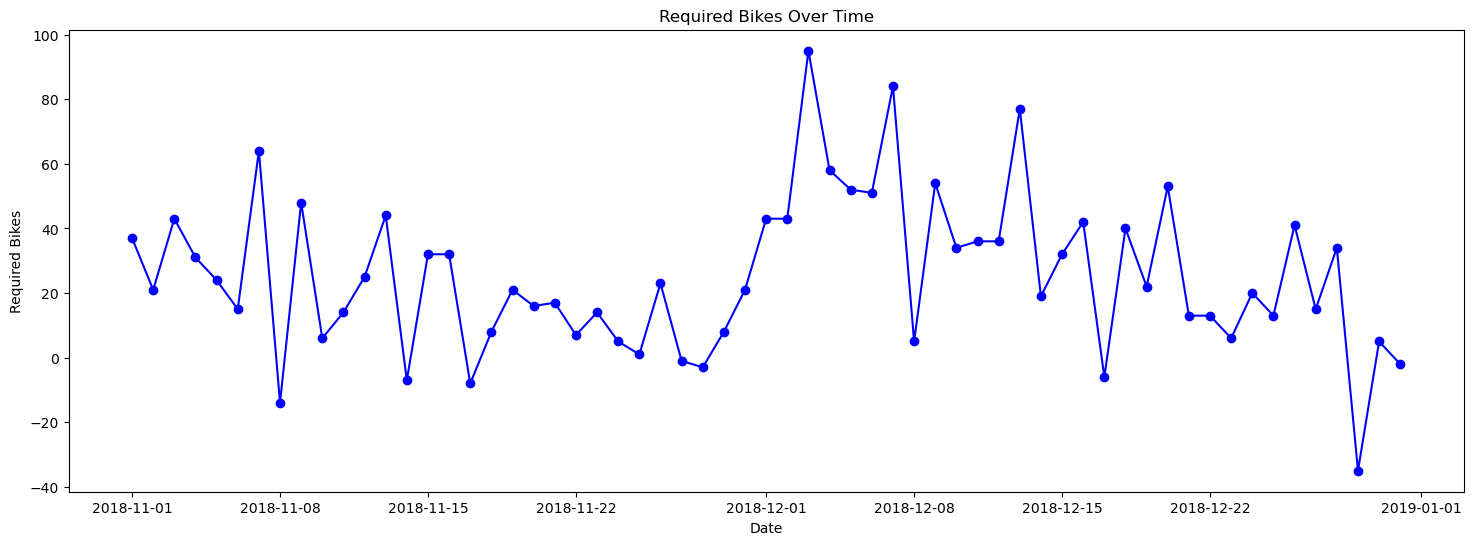

----------------------- M O D E L 2 --------------------------------
For date: 2018-11-01 Cluster: 1 needs 130 bikes.
For date: 2018-11-02 Cluster: 1 needs 115 bikes.
For date: 2018-11-03 Cluster: 1 needs 123 bikes.
For date: 2018-11-04 Cluster: 1 needs 193 bikes.
For date: 2018-11-05 Cluster: 1 needs 270 bikes.
For date: 2018-11-06 Cluster: 1 needs 76 bikes.
For date: 2018-11-07 Cluster: 1 needs 288 bikes.
For date: 2018-11-08 Cluster: 1 needs 305 bikes.
For date: 2018-11-09 Cluster: 1 needs 98 bikes.
For date: 2018-11-10 Cluster: 1 needs 291 bikes.
For date: 2018-11-11 Cluster: 1 needs 199 bikes.
For date: 2018-11-12 Cluster: 1 needs 117 bikes.
For date: 2018-11-13 Cluster: 1 needs 21 bikes.
For date: 2018-11-14 Cluster: 1 needs 44 bikes.
For date: 2018-11-15 Cluster: 1 needs 75 bikes.
For date: 2018-11-16 Cluster: 1 needs 89 bikes.
For date: 2018-11-17 Cluster: 1 needs 472 bikes.
For date: 2018-11-18 Cluster: 1 needs 161 bikes.
For date: 2018-11-19 Cluster: 1 needs 268 bikes.
For da

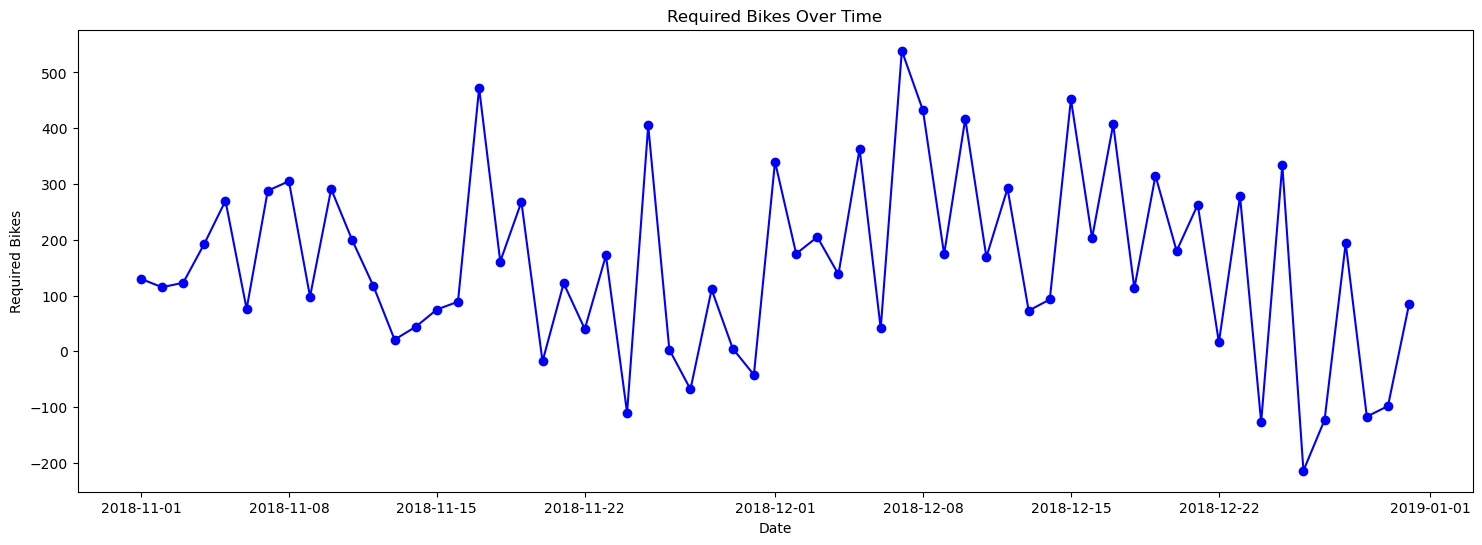

In [ ]:
i = 0
for prediction_df in prediction_dfs:
    i = i+1
    print(f"----------------------- M O D E L {i} --------------------------------")
    prediction_df['pickups'] = prediction_df['pickups'].astype(int)
    prediction_df['dropoffs'] = prediction_df['dropoffs'].astype(int)
    # Calculate daily cumulative arrivals and departures
    prediction_df['daily_cumulative_arrivals'] = prediction_df.groupby('day')['dropoffs'].transform('cumsum')
    prediction_df['daily_cumulative_departures'] = prediction_df.groupby('day')['pickups'].transform('cumsum')

    daily_cumulative = prediction_df.groupby(prediction_df.index)[['daily_cumulative_arrivals', 'daily_cumulative_departures']].last()
    daily_cumulative['required_bikes'] = daily_cumulative['daily_cumulative_departures'] - daily_cumulative['daily_cumulative_arrivals']
    
    for date in daily_cumulative.index:
        print(f"For date: {date} Cluster: {max_cluster_label} needs {daily_cumulative.loc[date, 'required_bikes']} bikes.")
    
    %matplotlib inline
    fig, ax = plt.subplots(figsize=(18, 6))
    daily_cumulative['required_bikes'].plot(marker='o', linestyle='-', color='b', ax=ax)
    ax.set_xlabel('Date')
    ax.set_ylabel('Required Bikes')
    ax.set_title('Required Bikes Over Time')
    plt.show()
    

In [ ]:
orig = df.copy()
orig['starttime'] = pd.to_datetime(orig['starttime'])
#create date column based on starttime and set is as index
orig['date'] = orig['starttime'].dt.date
orig.set_index('date', inplace=True)

repl = df23.copy()
repl['starttime'] = pd.to_datetime(repl['starttime'])
#create date column based on starttime and set is as index
repl['date'] = repl['starttime'].dt.date
repl.set_index('date', inplace=True)


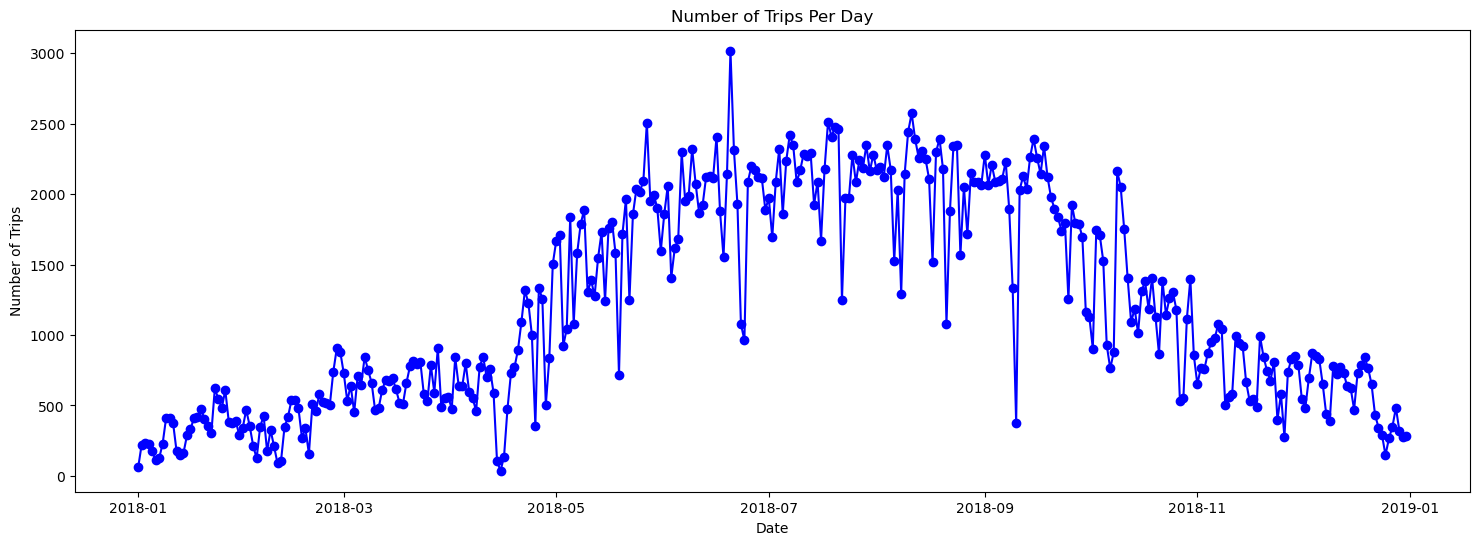

In [ ]:
#plot the number of trips per day for the repl dataframe 
fig, ax = plt.subplots(figsize=(18, 6))
repl.groupby('date').size().plot(marker='o', linestyle='-', color='b', ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Trips')
ax.set_title('Number of Trips Per Day')
plt.show()

#multiply the number of trips per day by 20
repl['trips'] = repl.groupby('date').size() * 25

In [ ]:
repl

,Unnamed: 0,starttime,from_station_id,endtime,to_station_id,user_type,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,cluster,trips
date,,,,,,,,,,,,
2018-01-01,5,2018-01-01 01:07:00,7078,2018-01-01 01:24:00,7130,Annual Member,43.657476,-79.402638,43.676015,-79.394619,2,122
2018-01-01,7,2018-01-01 01:34:00,7046,2018-01-01 01:47:00,7275,Annual Member,43.644474,-79.412027,43.689125,-79.756207,9,122
2018-01-01,13,2018-01-01 01:57:00,7078,2018-01-01 02:01:00,7195,Annual Member,43.657476,-79.402638,43.659894,-79.409192,2,122
2018-01-01,16,2018-01-01 02:29:00,7140,2018-01-01 02:35:00,7003,Annual Member,43.675748,-79.407661,43.668088,-79.403144,17,122
2018-01-01,17,2018-01-01 02:30:00,7149,2018-01-01 02:36:00,7153,Annual Member,43.669806,-79.420905,43.662278,-79.423702,4,122
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,1922945,2018-12-31 23:16:00,7192,2018-12-31 23:22:00,7078,Annual Member,43.661604,-79.416349,43.657476,-79.402638,4,570
2018-12-31,1922948,2018-12-31 23:27:00,7152,2018-12-31 23:32:00,7153,Annual Member,43.662080,-79.425779,43.662278,-79.423702,4,570
2018-12-31,1922950,2018-12-31 23:43:00,7088,2018-12-31 23:49:00,7091,Annual Member,43.683242,-79.323440,43.681027,-79.337787,13,570


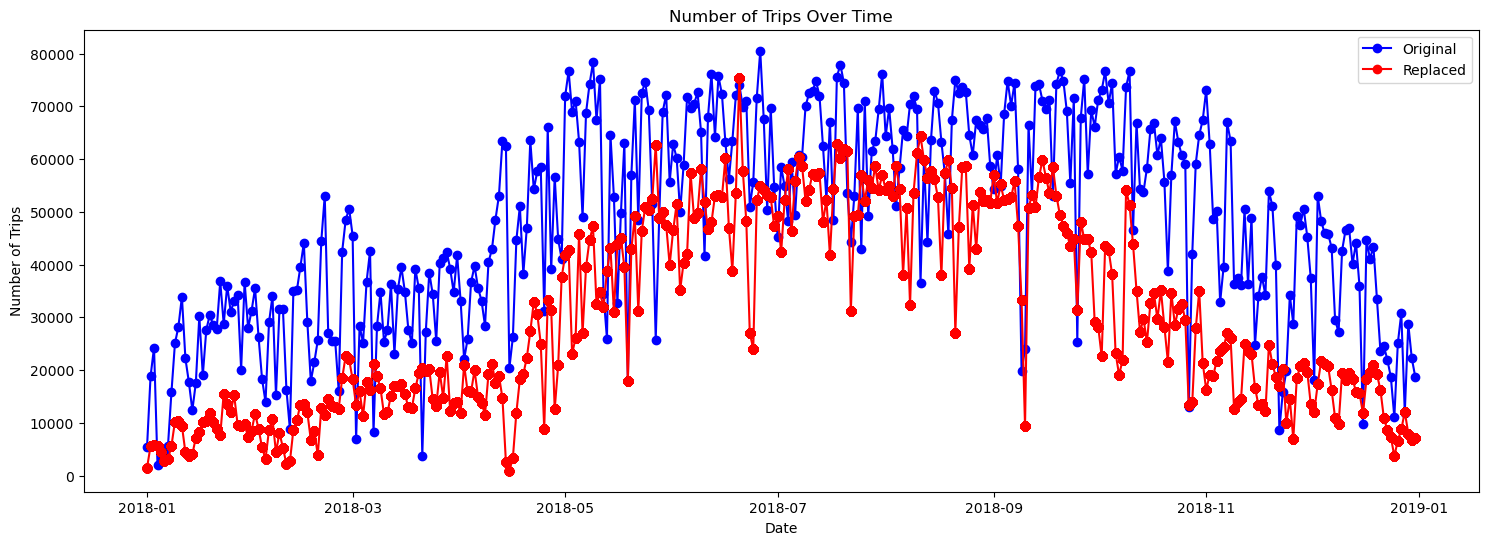

In [ ]:






fig, ax = plt.subplots(figsize=(18, 6))
orig.groupby('date').size().plot(marker='o', linestyle='-', color='b', ax=ax, label='Original')
repl.trips.plot(marker='o', linestyle='-', color='r', ax=ax, label='Replaced')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Trips')
ax.set_title('Number of Trips Over Time')
ax.legend()
plt.show()

#i want the number of trips of the repl to be times 20


---

## Exploratory Part 3

### Schools and Genders

In [ ]:
schools = pd.read_csv("Public_Schools_Points_2011-2012A.csv")
stations = pd.read_csv("clustered_stations.csv")

In [ ]:
#keep only the rows with gender either 1 or 2 in the stations df
stations = stations[stations['gender'].isin([1,2])]

In [ ]:
#find me unique clusters
clusters = stations['cluster'].unique()

In [ ]:
clusttemp = stations[stations['cluster'] == clusters[0]]
user_type_percentages = clusttemp['gender'].value_counts(normalize=True) * 100
data = {}
data["cluster"] = i,
data["men"] = user_type_percentages[1]
data["women"] = user_type_percentages[2]
df2 = pd.DataFrame(data)

for i in clusters[1:]:
    clusttemp = stations[stations['cluster'] == i]
    user_type_percentages = clusttemp['gender'].value_counts(normalize=True) * 100
    data = {}
    data["cluster"] = i,
    data["men"] = user_type_percentages[1]
    data["women"] = user_type_percentages[2]
    df = pd.DataFrame(data)
    df2 = pd.concat([df2, df], ignore_index=True)

   



In [ ]:
#sort the df2 by women
df2 = df2.sort_values(by=['women'])

In [ ]:
df2

,cluster,men,women
18,7,96.202532,3.797468
0,10,82.585008,17.414992
8,16,81.018789,18.981211
9,1,76.108317,23.891683
10,6,75.965837,24.034163
1,13,74.765280,25.234720
11,3,74.424221,25.575779
13,15,74.356638,25.643362
5,12,74.317331,25.682669
19,10,73.647836,26.352164


In [ ]:
#keep just the unique start_station_id in the stations df
stationsu = stations.drop_duplicates(subset=['start_station_id'])

#merge the stationsu and the df2 on cluster
df3 = pd.merge(stationsu, df2, on='cluster', how='left')



                   starttime  tripduration                 stoptime  \
0    2018-01-01 13:50:57.434           970  2018-01-01 14:07:08.186   
1    2018-01-01 11:29:51.339           130  2018-01-01 11:32:01.416   
2    2018-01-01 07:26:11.772          1938  2018-01-01 07:58:29.902   
3    2018-01-01 08:20:14.048           904  2018-01-01 08:35:18.290   
4    2018-01-01 12:05:45.677           178  2018-01-01 12:08:43.877   
..                       ...           ...                      ...   
871  2018-12-05 10:45:35.891           447  2018-12-05 10:53:03.328   
872  2018-12-07 19:38:59.011           270  2018-12-07 19:43:29.295   
873  2018-12-13 16:20:30.620           369  2018-12-13 16:26:40.263   
874  2018-12-13 16:20:30.620           369  2018-12-13 16:26:40.263   
875  2018-12-14 08:58:59.830           404  2018-12-14 09:05:44.233   

     start_station_id  start_station_latitude  start_station_longitude  \
0                  72               40.767272               -73.993929   

In [ ]:
#remove the rows with cluster 7 as it it is an outlier
df3 = df3[df3['cluster'] != 7]

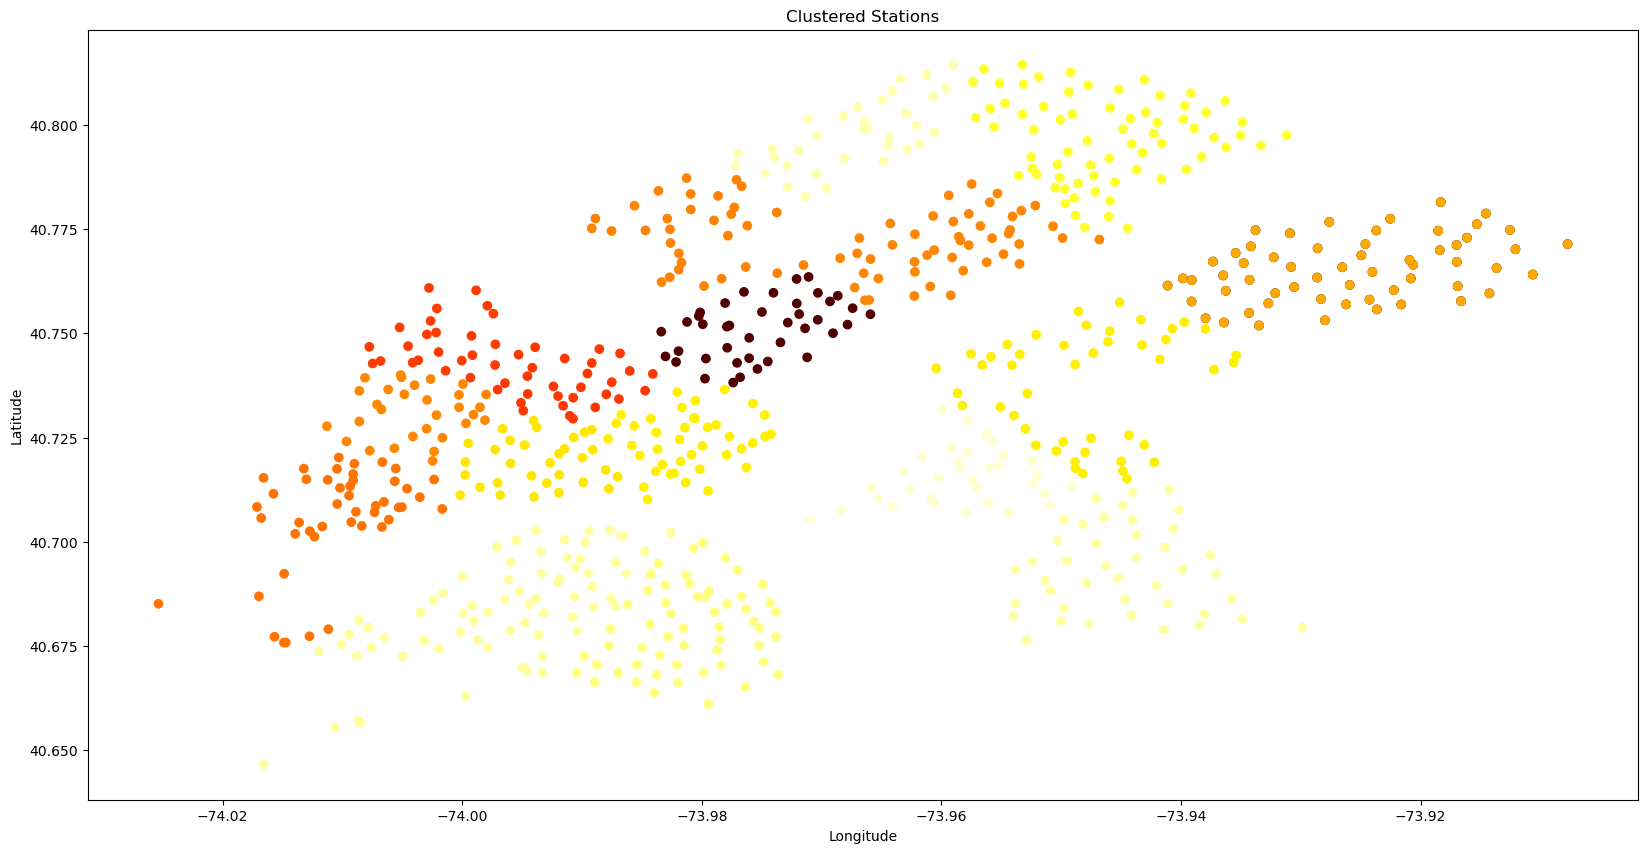

In [ ]:
#plot the df3 with diferrent cluster colors
plt.figure(figsize=(20,10))
plt.scatter(df3['start_station_longitude'], df3['start_station_latitude'], c=df3['women'], cmap='hot')
plt.title('Clustered Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()





![image.png](attachment:image.png)

Our initial thought was that women do not prefer to bike on "dabgerous" or "sketchy" areas, and this is mostly true. According to the map above, we can see that our orange and red areas are matching. At the same time, our representation seems to also matches the areas with the most accidents. 

In [ ]:
#create a column with the distance covered by every row using the manhattan distance
stations['distance'] = (abs(stations['start_station_longitude'] - stations['end_station_longitude']) + abs(stations['start_station_latitude'] - stations['end_station_latitude']))*110.574

C:\Users\Ioannis\AppData\Local\Temp\ipykernel_17856\4248248160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations['distance'] = (abs(stations['start_station_longitude'] - stations['end_station_longitude']) + abs(stations['start_station_latitude'] - stations['end_station_latitude']))*110.574


In [ ]:
df3 = stations.copy()

In [ ]:
#create a male df with gander 1
male = df3[df3['gender'] == 1] 
female = df3[df3['gender'] == 2]

In [ ]:
#remove all the rows with distance < 1 and > 10
male = male[male['distance'] > 1 ]
male = male[male['distance'] < 10] 
female = female[female['distance'] > 1]
female = female[female['distance'] < 10]

In [ ]:
male['distance'].describe()

count    9.528900e+06
mean     2.862551e+00
std      1.759473e+00
min      1.000104e+00
25%      1.570589e+00
50%      2.302541e+00
75%      3.575355e+00
max      9.999981e+00
Name: distance, dtype: float64

In [ ]:
female['distance'].describe()   

count    3.367526e+06
mean     2.930431e+00
std      1.758563e+00
min      1.000104e+00
25%      1.623862e+00
50%      2.385684e+00
75%      3.704019e+00
max      9.999093e+00
Name: distance, dtype: float64

Men bike more but women bike longer. As we can see men tend to have much more trips recorded but with a huge chunk of them being really short ones. At the same time men are the ones that are also holding the longest trips. Putting all that aside and removing the outliers from the dataset, we can see that those two genders perform very similarly according to statistics. What is particularly interesting is that on average women tend to bike longer. Combining this with the fact that men perform 3 times more trips than women, we can only assume that women use bikes for more serious purposes and to get work done, rather than just small trips for for fun!

Another assumption would be that men are less afraid, meaninng that they tend to use bike even for not serious purposes, rather than just "have-to".

In [ ]:
#print only selected cluster (helped me with the women not biking in bad neighbourhoods)
test = stations[stations['cluster'] == 10]

test = test.drop_duplicates(subset=['start_station_id'])

#plot a map using folium and the lat/long of the schools
import folium
from folium import plugins
from folium.plugins import HeatMap

# Create a map
m = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Add points to the map
for index, row in test.iterrows():
    folium.CircleMarker([row['start_station_latitude'], row['start_station_longitude']],
                        radius=2,
                        fill=True,
                        fill_opacity=0.5).add_to(m)

# Display the map
m



---

In [ ]:
#remove rows with no lat/long
schools = schools.dropna(subset=['Latitude', 'Longitude'])
schools

,ATS_CODE,BORO,BORONUM,LOC_CODE,SCHOOLNAME,SCH_TYPE,MANAGED_BY,GEO_DISTRI,ADMIN_DIST,ADDRESS,STATE_CODE,ZIP,PRINCIPAL,PRIN_PH,FAX,GRADES,City,Latitude,Longitude
1,17K002,K,2,K002,M.S. 002,Junior High-Intermediate-Middle,1,17,17,655 PARKSIDE AVENUE,NY,11226,ADRIENNE SPENCER,718-462-6992,718-284-7717,"06,07,08,SE",BROOKLYN,40.656399,-73.951625
2,21K095,K,2,K095,P.S. 095 THE GRAVESEND,K-8,1,21,21,345 VAN SICKLEN STREET,NY,11223,Janet Ndzibah,718-449-5050,718-449-3047,"PK,0K,01,02,03,04,05,06,07,08,SE",BROOKLYN,40.595959,-73.974874
3,21K096,K,2,K096,I.S. 096 SETH LOW,Junior High-Intermediate-Middle,1,21,21,99 AVENUE P,NY,11204,Denise Sandra Levinsky,718-236-1344,718-236-2397,"06,07,08,SE",BROOKLYN,40.607726,-73.984906
4,21K097,K,2,K097,P.S. 97 THE HIGHLAWN,Elementary,1,21,21,1855 STILLWELL AVENUE,NY,11223,KRISTINE MUSTILLO,718-372-7393,718-372-3842,"PK,0K,01,02,03,04,05,SE",BROOKLYN,40.600838,-73.985460
5,21K098,K,2,K098,I.S. 98 BAY ACADEMY,Junior High-Intermediate-Middle,1,21,21,1401 EMMONS AVENUE,NY,11235,MARIA TIMO,718-891-9005,718-891-3865,"06,07,08,SE",BROOKLYN,40.583773,-73.954220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,84M522,M,1,M522,Broome Street Academy Charter High School,High school,2,2,84,121 AVENUE OF THE AMERICAS,NY,10013,NaN,NaN,NaN,"09,SE",MANHATTAN,40.724125,-74.005144
1702,84M524,M,1,M524,Innovate Manhattan Charter School,Junior High-Intermediate-Middle,2,2,84,52 CHAMBERS STREET,NY,10007,NaN,NaN,NaN,"06,07,SE",MANHATTAN,40.713399,-74.005542
1704,84Q359,Q,4,Q359,Academy of the City Charter School,Elementary,2,30,84,36-14 12TH STREET,NY,11106,NaN,NaN,NaN,"0K,01,SE",QUEENS,40.760330,-73.939695
1705,84X538,X,2,X538,Icahn Charter School 5,Elementary,2,11,84,1500 PELHAM PARKWAY SOUTH,NY,10461,NaN,NaN,NaN,"0K,01,02,SE",BRONX,40.856625,-73.842592


In [ ]:
# i want lon between -73.93 and 74.01 and lat between 40.81 and 40.66
schools = schools[(schools['Longitude'] < -73.93) & (schools['Longitude'] > -74.01)]
schools = schools[(schools['Latitude'] > 40.66) & (schools['Latitude'] < 40.81)]



In [ ]:
missing_values = schools.isnull().sum()
print(missing_values)

starttime                  0
tripduration               0
stoptime                   0
start_station_id           0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_latitude       0
end_station_longitude      0
bikeid                     0
usertype                   0
birth_year                 0
gender                     0
age                        0
cluster                    0
distance                   0
dtype: int64


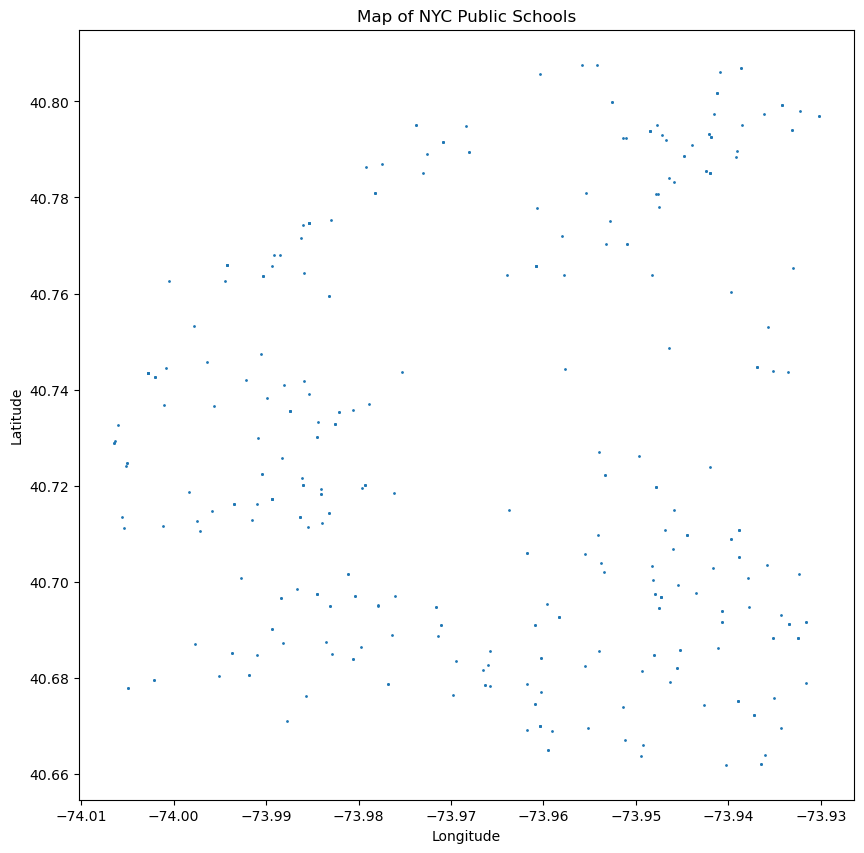

In [ ]:
#plot a map of the schools using the lat/long
plt.figure(figsize=(10,10))
plt.scatter(schools['Longitude'], schools['Latitude'], s=1)
plt.title('Map of NYC Public Schools')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
#create a dataframe with unique stations and their lan and long
stationsun = stations.drop_duplicates(subset=['start_station_id'])

In [ ]:


def manhattan_distance(x1, y1, x2, y2):
    """
    Calculate Manhattan distance between two coordinates.
    
    Parameters:
    - coord1: Tuple (x1, y1) representing the first coordinate.
    - coord2: Tuple (x2, y2) representing the second coordinate.
    
    Returns:
    - Manhattan distance between coord1 and coord2.
    """
    # x1, y1 = coord1
    # x2, y2 = coord2
    return (abs(x2 - x1) + abs(y2 - y1))*110.574

# Example coordinates (replace with your actual coordinates)
start_station = (40.755370, -73.975472)  # Example: New York City coordinates
end_station = (40.762987, -73.974000)   # Example: Los Angeles coordinates

# Calculate Manhattan distance
distance = manhattan_distance(40.755370, -73.975472, 40.762987, -73.974000)

# Print the result
print(f"Manhattan Distance: {distance} units (e.g., degrees of latitude/longitude)")


Manhattan Distance: 1.0050070859995472 units (e.g., degrees of latitude/longitude)


In [ ]:
#for every school find the closest station and add a column to the schools dataframe with the closest station
closest_station = []
for index, row in schools.iterrows():
    min
    for index2, row2 in stationsun.iterrows():
        distance = manhattan_distance(row['Latitude'], row['Longitude'], row2['start_station_latitude'], row2['start_station_longitude'])
        if index2 == 0:
            min = distance
            closest = row2['start_station_id']
        elif distance < min:
            min = distance
            closest = row2['start_station_id']
    closest_station.append(closest)
schools['closest_station'] = closest_station
schools






,ATS_CODE,BORO,BORONUM,LOC_CODE,SCHOOLNAME,SCH_TYPE,MANAGED_BY,GEO_DISTRI,ADMIN_DIST,ADDRESS,STATE_CODE,ZIP,PRINCIPAL,PRIN_PH,FAX,GRADES,City,Latitude,Longitude,closest_station
10,13K103,K,2,K103,SATELLITE THREE,Junior High-Intermediate-Middle,1,13,13,170 GATES AVENUE,NY,11238,Beatrice Thompson,718-789-5835,718-789-5814,"06,07,08,SE",BROOKLYN,40.684069,-73.960275,289
17,14K110,K,2,K110,P.S. 110 THE MONITOR,Elementary,1,14,14,124 MONITOR STREET,NY,11222,ANNA CANO AMATO,718-383-7600,718-383-5053,"PK,0K,01,02,03,04,05,SE",BROOKLYN,40.723875,-73.942033,3106
19,13K113,K,2,K113,M.S. 113 RONALD EDMONDS LEARNING CENTER,Junior High-Intermediate-Middle,1,13,13,300 ADELPHI STREET,NY,11205,Dawnique Daughtry,718-834-6734,718-596-2802,"06,07,08,SE",BROOKLYN,40.688560,-73.971447,416
24,14K120,K,2,K120,P.S. 120 CARLOS TAPIA,Elementary,1,14,14,18 BEAVER STREET,NY,11206,Liza Caraballo,718-455-1000,718-574-6637,"PK,0K,01,02,03,04,05,SE",BROOKLYN,40.700642,-73.937838,3064
28,14K126,K,2,K126,JOHN ERICSSON MIDDLE SCHOOL 126,Junior High-Intermediate-Middle,1,14,14,424 LEONARD STREET,NY,11222,ROSEMARY OCHOA,718-782-2527,718-302-2319,"06,07,08,SE",BROOKLYN,40.719764,-73.947792,3452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,84K406,K,3,K406,Teaching Firms of America-Professional Prepara...,Elementary,2,16,84,616 QUINCY STREET,NY,11221,NaN,NaN,NaN,"0K,01,02,03,04,05,SE",BROOKLYN,40.688296,-73.935229,3052
1699,84M518,M,1,M518,East Harlem Scholars Academy Charter School,Elementary,2,4,84,1573 MADISON AVENUE,NY,10029,NaN,NaN,NaN,"0K,01,SE",MANHATTAN,40.793765,-73.948464,3387
1700,84M522,M,1,M522,Broome Street Academy Charter High School,High school,2,2,84,121 AVENUE OF THE AMERICAS,NY,10013,NaN,NaN,NaN,"09,SE",MANHATTAN,40.724125,-74.005144,3474
1702,84M524,M,1,M524,Innovate Manhattan Charter School,Junior High-Intermediate-Middle,2,2,84,52 CHAMBERS STREET,NY,10007,NaN,NaN,NaN,"06,07,SE",MANHATTAN,40.713399,-74.005542,330


In [ ]:
#create a column with distance from school to closest station
distance = []
for index, row in schools.iterrows():
    for index2, row2 in stationsun.iterrows():
        if row['closest_station'] == row2['start_station_id']:
            distance.append(manhattan_distance(row['Latitude'], row['Longitude'], row2['start_station_latitude'], row2['start_station_longitude']))
schools['distance'] = distance
schools

,ATS_CODE,BORO,BORONUM,LOC_CODE,SCHOOLNAME,SCH_TYPE,MANAGED_BY,GEO_DISTRI,ADMIN_DIST,ADDRESS,...,ZIP,PRINCIPAL,PRIN_PH,FAX,GRADES,City,Latitude,Longitude,closest_station,distance
10,13K103,K,2,K103,SATELLITE THREE,Junior High-Intermediate-Middle,1,13,13,170 GATES AVENUE,...,11238,Beatrice Thompson,718-789-5835,718-789-5814,"06,07,08,SE",BROOKLYN,40.684069,-73.960275,289,0.217155
17,14K110,K,2,K110,P.S. 110 THE MONITOR,Elementary,1,14,14,124 MONITOR STREET,...,11222,ANNA CANO AMATO,718-383-7600,718-383-5053,"PK,0K,01,02,03,04,05,SE",BROOKLYN,40.723875,-73.942033,3106,0.184960
19,13K113,K,2,K113,M.S. 113 RONALD EDMONDS LEARNING CENTER,Junior High-Intermediate-Middle,1,13,13,300 ADELPHI STREET,...,11205,Dawnique Daughtry,718-834-6734,718-596-2802,"06,07,08,SE",BROOKLYN,40.688560,-73.971447,416,0.246769
24,14K120,K,2,K120,P.S. 120 CARLOS TAPIA,Elementary,1,14,14,18 BEAVER STREET,...,11206,Liza Caraballo,718-455-1000,718-574-6637,"PK,0K,01,02,03,04,05,SE",BROOKLYN,40.700642,-73.937838,3064,0.452439
28,14K126,K,2,K126,JOHN ERICSSON MIDDLE SCHOOL 126,Junior High-Intermediate-Middle,1,14,14,424 LEONARD STREET,...,11222,ROSEMARY OCHOA,718-782-2527,718-302-2319,"06,07,08,SE",BROOKLYN,40.719764,-73.947792,3452,0.184592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,84K406,K,3,K406,Teaching Firms of America-Professional Prepara...,Elementary,2,16,84,616 QUINCY STREET,...,11221,NaN,NaN,NaN,"0K,01,02,03,04,05,SE",BROOKLYN,40.688296,-73.935229,3052,0.279710
1699,84M518,M,1,M518,East Harlem Scholars Academy Charter School,Elementary,2,4,84,1573 MADISON AVENUE,...,10029,NaN,NaN,NaN,"0K,01,SE",MANHATTAN,40.793765,-73.948464,3387,0.145671
1700,84M522,M,1,M522,Broome Street Academy Charter High School,High school,2,2,84,121 AVENUE OF THE AMERICAS,...,10013,NaN,NaN,NaN,"09,SE",MANHATTAN,40.724125,-74.005144,3474,0.238134
1702,84M524,M,1,M524,Innovate Manhattan Charter School,Junior High-Intermediate-Middle,2,2,84,52 CHAMBERS STREET,...,10007,NaN,NaN,NaN,"06,07,SE",MANHATTAN,40.713399,-74.005542,330,0.131683


In [ ]:
#get me a a list of unique closest stations
unique_stations = schools['closest_station'].unique()
unique_stations

array([ 289, 3106,  416, 3064, 3452, 3086, 3571, 3396, 3074,  372, 3604,
       3043, 3044, 3590, 3072, 3068, 3410,  119, 3415, 3052,  364,  144,
       3041, 3066, 3241,  418, 3582, 3069, 3080, 3047, 3576,  278, 3594,
       3078, 3486, 3371, 3065, 3058, 3303,  274, 3332,  467, 3076, 3042,
       3083,  232, 3585,  270, 3549, 3637, 3421,  310, 3587,  298, 3059,
       3048, 3574, 3631,  344, 3107, 3714, 3060,  397,  437,  308,  331,
        358, 3362, 3506, 3170,  470, 3390, 3387,  326,  410,  447, 3498,
       3425,  461,  361, 3499,  545, 3351, 3305, 3494, 3134, 3307, 3301,
        302, 3495, 3400,  480,  527,  296, 2009,  268,  412,  502,  349,
       3391, 3491, 3151, 3289, 3438, 3284, 3367, 3540, 3141, 3683, 3521,
        223,  173, 3156, 3376,  504, 3161, 3712, 3356, 3527,   72, 3671,
        291,  311, 3660, 3658, 3622,  402, 3463, 3474,  513,  537, 3140,
        345, 3497,  435,  497,  422,  347,   82,  495,  478,  400,  379,
        325, 3263,  446, 3424, 3699, 3318,  265, 33

In [ ]:
#create a dataframe with the unique stations and their distance from the school
station_distance = pd.DataFrame(columns=['closest_station', 'distance'])

In [ ]:
#from the stations df keep only the rows with the stations in the unique_stations list
stationsww = stations[stations['start_station_id'].isin(unique_stations)]
stationsww

,starttime,tripduration,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,age,cluster,distance
0,2018-01-01 13:50:57.434,970,2018-01-01 14:07:08.186,72,40.767272,-73.993929,505,40.749013,-73.988484,31956,Subscriber,1992,1,26,14,2.621088
1,2018-01-01 15:33:30.182,723,2018-01-01 15:45:33.341,72,40.767272,-73.993929,3255,40.750585,-73.994685,32536,Subscriber,1969,1,49,14,1.928714
2,2018-01-01 15:39:18.337,496,2018-01-01 15:47:35.172,72,40.767272,-73.993929,525,40.755942,-74.002116,16069,Subscriber,1956,1,62,14,2.158182
3,2018-01-01 15:40:13.372,306,2018-01-01 15:45:20.191,72,40.767272,-73.993929,447,40.763707,-73.985162,31781,Subscriber,1974,1,44,14,1.363615
4,2018-01-01 18:14:51.568,306,2018-01-01 18:19:57.642,72,40.767272,-73.993929,3356,40.774667,-73.984706,30319,Subscriber,1992,1,26,14,1.837535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17525115,2018-12-31 23:30:41.749,924,2018-12-31 23:46:06.703,446,40.744876,-73.995299,516,40.752069,-73.967844,34663,Subscriber,1980,1,38,1,3.831089
17525122,2018-12-31 23:36:51.092,306,2018-12-31 23:41:57.366,82,40.711174,-74.000165,340,40.712690,-73.987763,15864,Subscriber,1995,1,23,4,1.539022
17525123,2018-12-31 23:37:03.857,927,2018-12-31 23:52:31.783,3151,40.772838,-73.949892,3137,40.772828,-73.966853,35203,Customer,1998,1,20,15,1.876514
17525126,2018-12-31 23:39:10.727,1015,2018-12-31 23:56:06.692,379,40.749156,-73.991600,301,40.722174,-73.983688,34170,Subscriber,1985,1,33,14,3.858344


In [ ]:
#on the stationsww keep only the row that are between 7 and 9 in the morning and 14 and 16 in the afternoon
stationsww['starttime'] = pd.to_datetime(stationsww['starttime'])
#stationswwf = stationsww[(stationsww['starttime'].dt.hour >= 7) & (stationsww['starttime'].dt.hour <= 8)]
stationswwf = stationsww[(stationsww['starttime'].dt.hour == 15) ]
stationswwf








    

C:\Users\Ioannis\AppData\Local\Temp\ipykernel_17856\2554908504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stationsww['starttime'] = pd.to_datetime(stationsww['starttime'])


,starttime,tripduration,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,age,cluster,distance
1,2018-01-01 15:33:30.182,723,2018-01-01 15:45:33.341,72,40.767272,-73.993929,3255,40.750585,-73.994685,32536,Subscriber,1969,1,49,14,1.928714
2,2018-01-01 15:39:18.337,496,2018-01-01 15:47:35.172,72,40.767272,-73.993929,525,40.755942,-74.002116,16069,Subscriber,1956,1,62,14,2.158182
3,2018-01-01 15:40:13.372,306,2018-01-01 15:45:20.191,72,40.767272,-73.993929,447,40.763707,-73.985162,31781,Subscriber,1974,1,44,14,1.363615
18,2018-01-02 15:04:41.381,604,2018-01-02 15:14:45.709,72,40.767272,-73.993929,3635,40.754623,-73.995168,32505,Subscriber,1964,1,54,14,1.535613
19,2018-01-02 15:25:00.541,724,2018-01-02 15:37:05.323,72,40.767272,-73.993929,490,40.751551,-73.993934,19512,Subscriber,1965,1,53,14,1.738918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17522766,2018-12-31 15:57:06.269,1028,2018-12-31 16:14:15.162,3534,40.805159,-73.954692,3160,40.778968,-73.973747,34142,Subscriber,1968,1,50,2,5.003090
17522788,2018-12-31 15:58:45.271,434,2018-12-31 16:05:59.425,435,40.741740,-73.994156,3259,40.749370,-73.999234,19304,Subscriber,1977,1,41,1,1.405267
17522790,2018-12-31 15:58:55.031,328,2018-12-31 16:04:23.594,412,40.715816,-73.994224,291,40.713126,-73.984844,34958,Subscriber,1983,2,35,4,1.334535
17522793,2018-12-31 15:58:58.497,145,2018-12-31 16:01:23.851,545,40.736502,-73.978095,2003,40.733812,-73.980544,20130,Subscriber,1979,1,39,11,0.568273


In [ ]:
#on the stationsww keep only the row that are between 7 and 9 in the morning and 14 and 16 in the afternoon
stationsww['stoptime'] = pd.to_datetime(stationsww['stoptime'])
stationswwf = stationsww[(stationsww['stoptime'].dt.hour >= 7) & (stationsww['stoptime'].dt.hour <= 8)]
#stationswwf = stationsww[(stationsww['endtime'].dt.hour == 15) ]
stationswwf








    

C:\Users\Ioannis\AppData\Local\Temp\ipykernel_17856\2495056054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stationsww['stoptime'] = pd.to_datetime(stationsww['stoptime'])


,starttime,tripduration,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,age,cluster,distance
7,2018-01-02 08:06:14.331,434,2018-01-02 08:13:28.767,72,40.767272,-73.993929,173,40.760683,-73.984527,30525,Subscriber,1983,1,35,14,1.768131
50,2018-01-03 07:32:14.320,235,2018-01-03 07:36:09.759,72,40.767272,-73.993929,447,40.763707,-73.985162,19339,Subscriber,1967,1,51,14,1.363615
52,2018-01-03 07:58:10.915,445,2018-01-03 08:05:36.231,72,40.767272,-73.993929,173,40.760683,-73.984527,24907,Subscriber,1983,1,35,14,1.768131
54,2018-01-03 08:12:08.406,482,2018-01-03 08:20:10.782,72,40.767272,-73.993929,173,40.760683,-73.984527,30688,Subscriber,1987,1,31,14,1.768131
105,2018-01-05 07:50:36.258,585,2018-01-05 08:00:21.659,72,40.767272,-73.993929,173,40.760683,-73.984527,14577,Subscriber,1983,1,35,14,1.768131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17510268,2018-12-31 08:54:43.708,259,2018-12-31 08:59:03.557,383,40.735238,-74.000271,435,40.741740,-73.994156,20759,Subscriber,1985,1,33,12,1.395127
17510275,2018-12-31 08:54:51.445,217,2018-12-31 08:58:29.432,3553,40.801694,-73.957145,3521,40.798786,-73.952300,28779,Subscriber,1974,1,44,2,0.857291
17510278,2018-12-31 08:54:56.743,294,2018-12-31 08:59:51.685,504,40.732219,-73.981656,497,40.737050,-73.990093,30878,Subscriber,1973,2,45,11,1.467173
17510301,2018-12-31 08:55:33.724,241,2018-12-31 08:59:35.109,330,40.714505,-74.005628,3489,40.710700,-74.003541,34194,Subscriber,1966,2,52,13,0.651390


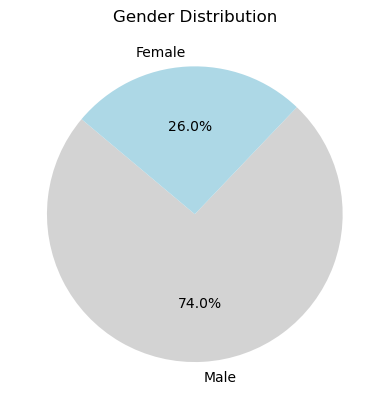

In [ ]:
# We will calculate the count of each gender
gender_counts = stationsww['gender'].value_counts()

labels = ['Male', 'Female']
colors = ['lightgray', 'lightblue', 'lightpink']
plt.pie(gender_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')

plt.show()

In [ ]:
#avg age of stationswwf
avg_age = stationswwf['age'].mean()
avg_age

38.949506387776175

In [ ]:
import json

with open(r'C:\Users\Ioannis\Downloads\Test - Copy.ipynb') as json_file:
    data = json.load(json_file)


wordCount = 0
for each in data['cells']:
    cellType = each['cell_type']
    if cellType == "markdown":
        content = each['source']
        for line in content:
            temp = [word for word in line.split() if "#" not in word] # we might need to filter for more markdown keywords here
            wordCount = wordCount + len(temp)
            
print(wordCount)

201


---

## Conclusion